# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Start of second method of lstm time series forecasting

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [5]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [6]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# View one time series

In [7]:
for i in range(22):
    print(list_of_row_components[i])

[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0]
[36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7.3]


# Get length of list of lists

In [8]:
len(list_of_row_components)

11506

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [9]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Convert format of list to have a single time series for each index

In [10]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [11]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

# Perform train test split for dataset

In [12]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


In [13]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


# For Dense model, flatten arrays for training

In [14]:
train_X_Dense = []

for x in train_X:
    flat_list = []
    for item in x:
        for element in item:
            flat_list.append(element)
    train_X_Dense.append(flat_list)

In [15]:
train_X_Dense = np.array(train_X_Dense)

train_X_Dense.shape

(300, 126)

In [16]:
test_X_Dense = []

for x in test_X:
    flat_list = []
    for item in x:
        for element in item:
            flat_list.append(element)
    test_X_Dense.append(flat_list)

In [17]:
test_X_Dense = np.array(test_X_Dense)

test_X_Dense.shape

(222, 126)

# Build simple Dense model

In [18]:
simple_dense_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.Input(shape=(126,)),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [19]:
simple_dense_model.compile(loss='mae', optimizer='adam')

# Train model

In [20]:
history = simple_dense_model.fit(train_X_Dense, train_y, epochs=2000, batch_size=32, validation_data=(test_X_Dense, test_y), verbose=2, shuffle=False)

Epoch 1/2000
10/10 - 0s - loss: 3189.4583 - val_loss: 6542.5552
Epoch 2/2000
10/10 - 0s - loss: 1891.4346 - val_loss: 5351.7319
Epoch 3/2000
10/10 - 0s - loss: 1302.9871 - val_loss: 1635.4974
Epoch 4/2000
10/10 - 0s - loss: 842.4114 - val_loss: 1364.1068
Epoch 5/2000
10/10 - 0s - loss: 913.8464 - val_loss: 802.2276
Epoch 6/2000
10/10 - 0s - loss: 368.4037 - val_loss: 526.0787
Epoch 7/2000
10/10 - 0s - loss: 550.7515 - val_loss: 2833.4839
Epoch 8/2000
10/10 - 0s - loss: 720.4504 - val_loss: 1877.7531
Epoch 9/2000
10/10 - 0s - loss: 547.4641 - val_loss: 748.8646
Epoch 10/2000
10/10 - 0s - loss: 457.3712 - val_loss: 863.5125
Epoch 11/2000
10/10 - 0s - loss: 410.7939 - val_loss: 1267.3541
Epoch 12/2000
10/10 - 0s - loss: 365.8538 - val_loss: 1811.6254
Epoch 13/2000
10/10 - 0s - loss: 319.8293 - val_loss: 1233.7573
Epoch 14/2000
10/10 - 0s - loss: 511.7637 - val_loss: 2879.8901
Epoch 15/2000
10/10 - 0s - loss: 564.7930 - val_loss: 622.1572
Epoch 16/2000
10/10 - 0s - loss: 539.9169 - val_los

Epoch 131/2000
10/10 - 0s - loss: 57.1918 - val_loss: 177.5252
Epoch 132/2000
10/10 - 0s - loss: 58.8864 - val_loss: 131.2805
Epoch 133/2000
10/10 - 0s - loss: 42.1155 - val_loss: 79.7592
Epoch 134/2000
10/10 - 0s - loss: 43.7928 - val_loss: 108.1134
Epoch 135/2000
10/10 - 0s - loss: 24.9507 - val_loss: 137.9840
Epoch 136/2000
10/10 - 0s - loss: 36.3882 - val_loss: 205.0136
Epoch 137/2000
10/10 - 0s - loss: 47.9398 - val_loss: 200.2230
Epoch 138/2000
10/10 - 0s - loss: 75.0618 - val_loss: 391.2867
Epoch 139/2000
10/10 - 0s - loss: 55.4842 - val_loss: 256.5433
Epoch 140/2000
10/10 - 0s - loss: 67.1236 - val_loss: 409.4054
Epoch 141/2000
10/10 - 0s - loss: 85.5994 - val_loss: 307.7668
Epoch 142/2000
10/10 - 0s - loss: 78.5411 - val_loss: 452.5053
Epoch 143/2000
10/10 - 0s - loss: 75.6264 - val_loss: 255.6377
Epoch 144/2000
10/10 - 0s - loss: 75.9760 - val_loss: 456.2769
Epoch 145/2000
10/10 - 0s - loss: 89.1060 - val_loss: 252.7418
Epoch 146/2000
10/10 - 0s - loss: 66.0059 - val_loss: 29

Epoch 262/2000
10/10 - 0s - loss: 19.7121 - val_loss: 79.1494
Epoch 263/2000
10/10 - 0s - loss: 24.2777 - val_loss: 54.0731
Epoch 264/2000
10/10 - 0s - loss: 17.7281 - val_loss: 56.6091
Epoch 265/2000
10/10 - 0s - loss: 20.9138 - val_loss: 89.6949
Epoch 266/2000
10/10 - 0s - loss: 32.8699 - val_loss: 85.1896
Epoch 267/2000
10/10 - 0s - loss: 26.0260 - val_loss: 55.7247
Epoch 268/2000
10/10 - 0s - loss: 29.2022 - val_loss: 80.3021
Epoch 269/2000
10/10 - 0s - loss: 23.6363 - val_loss: 49.6983
Epoch 270/2000
10/10 - 0s - loss: 20.9151 - val_loss: 72.6858
Epoch 271/2000
10/10 - 0s - loss: 27.8113 - val_loss: 38.4303
Epoch 272/2000
10/10 - 0s - loss: 19.7536 - val_loss: 69.0444
Epoch 273/2000
10/10 - 0s - loss: 29.9571 - val_loss: 100.8681
Epoch 274/2000
10/10 - 0s - loss: 28.2732 - val_loss: 100.0452
Epoch 275/2000
10/10 - 0s - loss: 22.9029 - val_loss: 59.8038
Epoch 276/2000
10/10 - 0s - loss: 23.2550 - val_loss: 108.7032
Epoch 277/2000
10/10 - 0s - loss: 30.8723 - val_loss: 142.8641
Epoc

Epoch 394/2000
10/10 - 0s - loss: 18.4384 - val_loss: 55.2288
Epoch 395/2000
10/10 - 0s - loss: 17.5809 - val_loss: 32.5969
Epoch 396/2000
10/10 - 0s - loss: 23.8680 - val_loss: 64.9535
Epoch 397/2000
10/10 - 0s - loss: 28.9633 - val_loss: 67.4590
Epoch 398/2000
10/10 - 0s - loss: 22.1995 - val_loss: 47.5194
Epoch 399/2000
10/10 - 0s - loss: 28.6049 - val_loss: 76.9345
Epoch 400/2000
10/10 - 0s - loss: 24.3655 - val_loss: 63.3989
Epoch 401/2000
10/10 - 0s - loss: 36.3366 - val_loss: 81.9679
Epoch 402/2000
10/10 - 0s - loss: 26.4343 - val_loss: 66.3147
Epoch 403/2000
10/10 - 0s - loss: 27.3443 - val_loss: 85.7808
Epoch 404/2000
10/10 - 0s - loss: 35.2145 - val_loss: 48.2871
Epoch 405/2000
10/10 - 0s - loss: 21.8217 - val_loss: 88.2796
Epoch 406/2000
10/10 - 0s - loss: 23.6158 - val_loss: 55.9183
Epoch 407/2000
10/10 - 0s - loss: 23.2244 - val_loss: 52.7504
Epoch 408/2000
10/10 - 0s - loss: 23.9462 - val_loss: 62.5666
Epoch 409/2000
10/10 - 0s - loss: 18.0180 - val_loss: 42.0846
Epoch 41

Epoch 527/2000
10/10 - 0s - loss: 17.2472 - val_loss: 44.9976
Epoch 528/2000
10/10 - 0s - loss: 29.6755 - val_loss: 100.1091
Epoch 529/2000
10/10 - 0s - loss: 29.4746 - val_loss: 52.8358
Epoch 530/2000
10/10 - 0s - loss: 31.5120 - val_loss: 71.1040
Epoch 531/2000
10/10 - 0s - loss: 20.8493 - val_loss: 40.5986
Epoch 532/2000
10/10 - 0s - loss: 24.9644 - val_loss: 38.8413
Epoch 533/2000
10/10 - 0s - loss: 25.5304 - val_loss: 76.1089
Epoch 534/2000
10/10 - 0s - loss: 22.2670 - val_loss: 27.5620
Epoch 535/2000
10/10 - 0s - loss: 25.7713 - val_loss: 58.6008
Epoch 536/2000
10/10 - 0s - loss: 17.5031 - val_loss: 36.7545
Epoch 537/2000
10/10 - 0s - loss: 19.7976 - val_loss: 39.2817
Epoch 538/2000
10/10 - 0s - loss: 15.2678 - val_loss: 46.7289
Epoch 539/2000
10/10 - 0s - loss: 12.8410 - val_loss: 38.3008
Epoch 540/2000
10/10 - 0s - loss: 20.9274 - val_loss: 69.0270
Epoch 541/2000
10/10 - 0s - loss: 23.5238 - val_loss: 17.6198
Epoch 542/2000
10/10 - 0s - loss: 16.2713 - val_loss: 33.4377
Epoch 5

Epoch 659/2000
10/10 - 0s - loss: 34.8362 - val_loss: 55.6771
Epoch 660/2000
10/10 - 0s - loss: 18.5566 - val_loss: 38.1667
Epoch 661/2000
10/10 - 0s - loss: 26.1438 - val_loss: 46.7930
Epoch 662/2000
10/10 - 0s - loss: 22.5793 - val_loss: 29.9077
Epoch 663/2000
10/10 - 0s - loss: 23.7477 - val_loss: 77.1495
Epoch 664/2000
10/10 - 0s - loss: 19.8581 - val_loss: 43.1921
Epoch 665/2000
10/10 - 0s - loss: 22.2624 - val_loss: 48.4641
Epoch 666/2000
10/10 - 0s - loss: 20.7724 - val_loss: 87.7856
Epoch 667/2000
10/10 - 0s - loss: 15.5971 - val_loss: 44.3847
Epoch 668/2000
10/10 - 0s - loss: 12.6528 - val_loss: 35.9595
Epoch 669/2000
10/10 - 0s - loss: 20.8630 - val_loss: 30.5190
Epoch 670/2000
10/10 - 0s - loss: 10.1079 - val_loss: 33.4663
Epoch 671/2000
10/10 - 0s - loss: 11.8780 - val_loss: 26.8542
Epoch 672/2000
10/10 - 0s - loss: 8.0572 - val_loss: 20.2317
Epoch 673/2000
10/10 - 0s - loss: 9.4858 - val_loss: 22.8014
Epoch 674/2000
10/10 - 0s - loss: 12.1969 - val_loss: 34.2800
Epoch 675/

Epoch 792/2000
10/10 - 0s - loss: 34.7433 - val_loss: 88.4797
Epoch 793/2000
10/10 - 0s - loss: 27.1108 - val_loss: 54.2028
Epoch 794/2000
10/10 - 0s - loss: 38.0333 - val_loss: 65.9944
Epoch 795/2000
10/10 - 0s - loss: 14.3764 - val_loss: 47.4494
Epoch 796/2000
10/10 - 0s - loss: 23.0203 - val_loss: 123.4094
Epoch 797/2000
10/10 - 0s - loss: 31.8689 - val_loss: 70.6773
Epoch 798/2000
10/10 - 0s - loss: 18.5809 - val_loss: 64.1450
Epoch 799/2000
10/10 - 0s - loss: 26.9064 - val_loss: 46.6914
Epoch 800/2000
10/10 - 0s - loss: 12.5424 - val_loss: 44.1323
Epoch 801/2000
10/10 - 0s - loss: 11.9369 - val_loss: 29.5539
Epoch 802/2000
10/10 - 0s - loss: 11.1477 - val_loss: 24.6295
Epoch 803/2000
10/10 - 0s - loss: 7.4742 - val_loss: 16.4368
Epoch 804/2000
10/10 - 0s - loss: 10.8688 - val_loss: 26.3394
Epoch 805/2000
10/10 - 0s - loss: 13.9293 - val_loss: 21.5584
Epoch 806/2000
10/10 - 0s - loss: 12.5956 - val_loss: 37.0326
Epoch 807/2000
10/10 - 0s - loss: 9.5635 - val_loss: 20.0350
Epoch 808

Epoch 925/2000
10/10 - 0s - loss: 16.0060 - val_loss: 35.2656
Epoch 926/2000
10/10 - 0s - loss: 14.2046 - val_loss: 23.8489
Epoch 927/2000
10/10 - 0s - loss: 16.9330 - val_loss: 45.5985
Epoch 928/2000
10/10 - 0s - loss: 17.3567 - val_loss: 23.9214
Epoch 929/2000
10/10 - 0s - loss: 19.4541 - val_loss: 33.4238
Epoch 930/2000
10/10 - 0s - loss: 16.2147 - val_loss: 71.1706
Epoch 931/2000
10/10 - 0s - loss: 15.9225 - val_loss: 32.6528
Epoch 932/2000
10/10 - 0s - loss: 11.0582 - val_loss: 68.4766
Epoch 933/2000
10/10 - 0s - loss: 27.1192 - val_loss: 54.4613
Epoch 934/2000
10/10 - 0s - loss: 33.8199 - val_loss: 41.8649
Epoch 935/2000
10/10 - 0s - loss: 27.6967 - val_loss: 59.4322
Epoch 936/2000
10/10 - 0s - loss: 21.1261 - val_loss: 126.5729
Epoch 937/2000
10/10 - 0s - loss: 33.0888 - val_loss: 35.9662
Epoch 938/2000
10/10 - 0s - loss: 32.9325 - val_loss: 67.3167
Epoch 939/2000
10/10 - 0s - loss: 31.9353 - val_loss: 66.8950
Epoch 940/2000
10/10 - 0s - loss: 23.8000 - val_loss: 189.6600
Epoch 

Epoch 1057/2000
10/10 - 0s - loss: 16.4837 - val_loss: 43.0736
Epoch 1058/2000
10/10 - 0s - loss: 17.2253 - val_loss: 26.8672
Epoch 1059/2000
10/10 - 0s - loss: 9.9897 - val_loss: 15.2315
Epoch 1060/2000
10/10 - 0s - loss: 6.2340 - val_loss: 26.0026
Epoch 1061/2000
10/10 - 0s - loss: 15.2613 - val_loss: 20.6039
Epoch 1062/2000
10/10 - 0s - loss: 8.7092 - val_loss: 17.1195
Epoch 1063/2000
10/10 - 0s - loss: 9.9192 - val_loss: 23.6909
Epoch 1064/2000
10/10 - 0s - loss: 12.6196 - val_loss: 17.8930
Epoch 1065/2000
10/10 - 0s - loss: 11.8774 - val_loss: 26.6555
Epoch 1066/2000
10/10 - 0s - loss: 11.1255 - val_loss: 31.8457
Epoch 1067/2000
10/10 - 0s - loss: 12.5087 - val_loss: 16.4472
Epoch 1068/2000
10/10 - 0s - loss: 13.9906 - val_loss: 26.7772
Epoch 1069/2000
10/10 - 0s - loss: 13.4426 - val_loss: 24.9432
Epoch 1070/2000
10/10 - 0s - loss: 12.7465 - val_loss: 38.9841
Epoch 1071/2000
10/10 - 0s - loss: 12.0962 - val_loss: 13.2555
Epoch 1072/2000
10/10 - 0s - loss: 9.8184 - val_loss: 19.42

Epoch 1188/2000
10/10 - 0s - loss: 10.3740 - val_loss: 16.7999
Epoch 1189/2000
10/10 - 0s - loss: 14.1452 - val_loss: 23.9485
Epoch 1190/2000
10/10 - 0s - loss: 11.4197 - val_loss: 19.2641
Epoch 1191/2000
10/10 - 0s - loss: 9.5384 - val_loss: 58.4425
Epoch 1192/2000
10/10 - 0s - loss: 15.7368 - val_loss: 22.8728
Epoch 1193/2000
10/10 - 0s - loss: 15.5829 - val_loss: 19.3093
Epoch 1194/2000
10/10 - 0s - loss: 19.0860 - val_loss: 33.3452
Epoch 1195/2000
10/10 - 0s - loss: 29.2673 - val_loss: 40.6330
Epoch 1196/2000
10/10 - 0s - loss: 45.5666 - val_loss: 120.2930
Epoch 1197/2000
10/10 - 0s - loss: 48.1676 - val_loss: 93.9797
Epoch 1198/2000
10/10 - 0s - loss: 56.9319 - val_loss: 121.3717
Epoch 1199/2000
10/10 - 0s - loss: 60.7010 - val_loss: 124.3287
Epoch 1200/2000
10/10 - 0s - loss: 54.2435 - val_loss: 182.6926
Epoch 1201/2000
10/10 - 0s - loss: 42.1528 - val_loss: 110.2305
Epoch 1202/2000
10/10 - 0s - loss: 35.0152 - val_loss: 73.3858
Epoch 1203/2000
10/10 - 0s - loss: 19.9810 - val_lo

Epoch 1319/2000
10/10 - 0s - loss: 9.2065 - val_loss: 36.5741
Epoch 1320/2000
10/10 - 0s - loss: 16.0544 - val_loss: 27.0513
Epoch 1321/2000
10/10 - 0s - loss: 12.8273 - val_loss: 24.5870
Epoch 1322/2000
10/10 - 0s - loss: 11.8181 - val_loss: 13.1460
Epoch 1323/2000
10/10 - 0s - loss: 8.9438 - val_loss: 24.7384
Epoch 1324/2000
10/10 - 0s - loss: 8.1460 - val_loss: 15.8265
Epoch 1325/2000
10/10 - 0s - loss: 9.8079 - val_loss: 18.9338
Epoch 1326/2000
10/10 - 0s - loss: 10.9557 - val_loss: 15.9218
Epoch 1327/2000
10/10 - 0s - loss: 7.9141 - val_loss: 18.7267
Epoch 1328/2000
10/10 - 0s - loss: 11.5228 - val_loss: 14.2138
Epoch 1329/2000
10/10 - 0s - loss: 8.3816 - val_loss: 18.9378
Epoch 1330/2000
10/10 - 0s - loss: 6.3032 - val_loss: 11.7829
Epoch 1331/2000
10/10 - 0s - loss: 5.9121 - val_loss: 9.9014
Epoch 1332/2000
10/10 - 0s - loss: 9.8354 - val_loss: 28.1100
Epoch 1333/2000
10/10 - 0s - loss: 9.5824 - val_loss: 19.3994
Epoch 1334/2000
10/10 - 0s - loss: 6.7795 - val_loss: 19.6414
Epoc

Epoch 1450/2000
10/10 - 0s - loss: 12.2905 - val_loss: 16.8897
Epoch 1451/2000
10/10 - 0s - loss: 7.6255 - val_loss: 21.4059
Epoch 1452/2000
10/10 - 0s - loss: 11.2980 - val_loss: 16.8631
Epoch 1453/2000
10/10 - 0s - loss: 10.3096 - val_loss: 22.5469
Epoch 1454/2000
10/10 - 0s - loss: 13.7799 - val_loss: 31.4580
Epoch 1455/2000
10/10 - 0s - loss: 12.8114 - val_loss: 34.4754
Epoch 1456/2000
10/10 - 0s - loss: 11.8812 - val_loss: 16.5249
Epoch 1457/2000
10/10 - 0s - loss: 11.3577 - val_loss: 22.3718
Epoch 1458/2000
10/10 - 0s - loss: 8.6291 - val_loss: 50.9311
Epoch 1459/2000
10/10 - 0s - loss: 14.1312 - val_loss: 25.4937
Epoch 1460/2000
10/10 - 0s - loss: 14.7729 - val_loss: 24.2725
Epoch 1461/2000
10/10 - 0s - loss: 11.4594 - val_loss: 31.8259
Epoch 1462/2000
10/10 - 0s - loss: 16.8291 - val_loss: 40.2094
Epoch 1463/2000
10/10 - 0s - loss: 17.8429 - val_loss: 51.4814
Epoch 1464/2000
10/10 - 0s - loss: 14.6622 - val_loss: 45.3375
Epoch 1465/2000
10/10 - 0s - loss: 13.1170 - val_loss: 27

Epoch 1582/2000
10/10 - 0s - loss: 11.6804 - val_loss: 26.7312
Epoch 1583/2000
10/10 - 0s - loss: 8.8665 - val_loss: 23.5363
Epoch 1584/2000
10/10 - 0s - loss: 10.8120 - val_loss: 31.6729
Epoch 1585/2000
10/10 - 0s - loss: 9.8333 - val_loss: 16.7983
Epoch 1586/2000
10/10 - 0s - loss: 11.8483 - val_loss: 27.0035
Epoch 1587/2000
10/10 - 0s - loss: 11.7747 - val_loss: 16.6541
Epoch 1588/2000
10/10 - 0s - loss: 11.6175 - val_loss: 25.1520
Epoch 1589/2000
10/10 - 0s - loss: 13.4374 - val_loss: 38.1702
Epoch 1590/2000
10/10 - 0s - loss: 11.3054 - val_loss: 25.4271
Epoch 1591/2000
10/10 - 0s - loss: 12.8873 - val_loss: 13.1392
Epoch 1592/2000
10/10 - 0s - loss: 10.8113 - val_loss: 13.7385
Epoch 1593/2000
10/10 - 0s - loss: 9.9104 - val_loss: 12.2812
Epoch 1594/2000
10/10 - 0s - loss: 8.5558 - val_loss: 22.6384
Epoch 1595/2000
10/10 - 0s - loss: 10.2785 - val_loss: 30.1407
Epoch 1596/2000
10/10 - 0s - loss: 12.2394 - val_loss: 17.7313
Epoch 1597/2000
10/10 - 0s - loss: 9.3453 - val_loss: 27.63

Epoch 1715/2000
10/10 - 0s - loss: 5.9765 - val_loss: 10.8404
Epoch 1716/2000
10/10 - 0s - loss: 6.2598 - val_loss: 14.1714
Epoch 1717/2000
10/10 - 0s - loss: 6.3728 - val_loss: 12.1026
Epoch 1718/2000
10/10 - 0s - loss: 5.8017 - val_loss: 10.4961
Epoch 1719/2000
10/10 - 0s - loss: 5.2658 - val_loss: 15.3857
Epoch 1720/2000
10/10 - 0s - loss: 6.5762 - val_loss: 11.7791
Epoch 1721/2000
10/10 - 0s - loss: 7.9788 - val_loss: 10.9734
Epoch 1722/2000
10/10 - 0s - loss: 5.0682 - val_loss: 9.6382
Epoch 1723/2000
10/10 - 0s - loss: 5.1178 - val_loss: 11.8110
Epoch 1724/2000
10/10 - 0s - loss: 6.5478 - val_loss: 13.0405
Epoch 1725/2000
10/10 - 0s - loss: 6.5497 - val_loss: 11.1236
Epoch 1726/2000
10/10 - 0s - loss: 5.2952 - val_loss: 11.4323
Epoch 1727/2000
10/10 - 0s - loss: 6.8211 - val_loss: 17.5896
Epoch 1728/2000
10/10 - 0s - loss: 9.3169 - val_loss: 13.5460
Epoch 1729/2000
10/10 - 0s - loss: 14.1711 - val_loss: 19.6021
Epoch 1730/2000
10/10 - 0s - loss: 11.3842 - val_loss: 18.2424
Epoch 1

Epoch 1847/2000
10/10 - 0s - loss: 7.1403 - val_loss: 13.4732
Epoch 1848/2000
10/10 - 0s - loss: 6.6574 - val_loss: 14.1382
Epoch 1849/2000
10/10 - 0s - loss: 7.6659 - val_loss: 11.3332
Epoch 1850/2000
10/10 - 0s - loss: 6.8297 - val_loss: 14.3260
Epoch 1851/2000
10/10 - 0s - loss: 7.6750 - val_loss: 13.0718
Epoch 1852/2000
10/10 - 0s - loss: 6.1017 - val_loss: 14.2368
Epoch 1853/2000
10/10 - 0s - loss: 6.4185 - val_loss: 16.2491
Epoch 1854/2000
10/10 - 0s - loss: 10.1148 - val_loss: 12.4950
Epoch 1855/2000
10/10 - 0s - loss: 8.0691 - val_loss: 10.6137
Epoch 1856/2000
10/10 - 0s - loss: 5.8060 - val_loss: 11.2039
Epoch 1857/2000
10/10 - 0s - loss: 4.9046 - val_loss: 9.6636
Epoch 1858/2000
10/10 - 0s - loss: 5.3382 - val_loss: 9.7016
Epoch 1859/2000
10/10 - 0s - loss: 5.2843 - val_loss: 15.0729
Epoch 1860/2000
10/10 - 0s - loss: 6.8253 - val_loss: 10.7383
Epoch 1861/2000
10/10 - 0s - loss: 5.2913 - val_loss: 10.4457
Epoch 1862/2000
10/10 - 0s - loss: 7.5062 - val_loss: 10.0559
Epoch 186

Epoch 1979/2000
10/10 - 0s - loss: 21.3538 - val_loss: 20.4508
Epoch 1980/2000
10/10 - 0s - loss: 20.8517 - val_loss: 40.4854
Epoch 1981/2000
10/10 - 0s - loss: 24.5720 - val_loss: 71.2503
Epoch 1982/2000
10/10 - 0s - loss: 32.7960 - val_loss: 224.2372
Epoch 1983/2000
10/10 - 0s - loss: 71.2144 - val_loss: 96.3924
Epoch 1984/2000
10/10 - 0s - loss: 35.7782 - val_loss: 80.5624
Epoch 1985/2000
10/10 - 0s - loss: 25.3766 - val_loss: 16.6770
Epoch 1986/2000
10/10 - 0s - loss: 10.5942 - val_loss: 49.2680
Epoch 1987/2000
10/10 - 0s - loss: 26.5833 - val_loss: 96.5237
Epoch 1988/2000
10/10 - 0s - loss: 36.4442 - val_loss: 57.7579
Epoch 1989/2000
10/10 - 0s - loss: 35.8028 - val_loss: 50.8229
Epoch 1990/2000
10/10 - 0s - loss: 17.5325 - val_loss: 49.7710
Epoch 1991/2000
10/10 - 0s - loss: 24.3074 - val_loss: 40.9842
Epoch 1992/2000
10/10 - 0s - loss: 13.6503 - val_loss: 20.0736
Epoch 1993/2000
10/10 - 0s - loss: 13.9861 - val_loss: 37.9014
Epoch 1994/2000
10/10 - 0s - loss: 11.0083 - val_loss:

# Plot model loss and validation loss

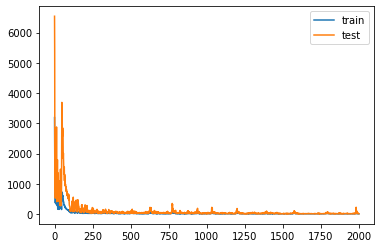

In [21]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# We now get the RMSE for both train and test sets to see if they differ by much

# Make predictions based on train set and get a root mean squared error 

In [22]:
from sklearn.metrics import mean_squared_error
import math

train_yhat = simple_dense_model.predict(train_X_Dense)
mse = mean_squared_error(train_y, train_yhat)
rmse = math.sqrt(mse)

In [23]:
print('Train RMSE: ' + str(rmse))

Train RMSE: 7.023552351554058


# Make predictions based on test set and get a root mean squared error 

In [24]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = simple_dense_model.predict(test_X_Dense)
mse = mean_squared_error(test_y, test_yhat)
rmse = math.sqrt(mse)

In [25]:
print('Test RMSE: ' + str(rmse))

Test RMSE: 17.803515485448383


# Plot train labels along with train predictions

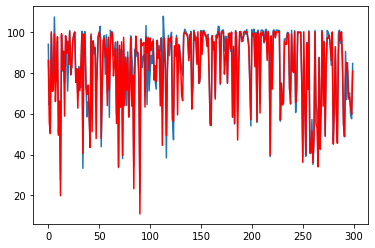

In [26]:
from matplotlib import pyplot

pyplot.plot(train_yhat, label='actual')
pyplot.plot(train_y, color='red', label='predicted')
pyplot.show()

# Plot test labels along with test predictions

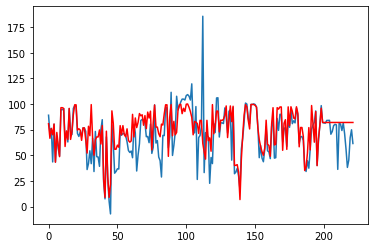

In [27]:
from matplotlib import pyplot

pyplot.plot(test_yhat, label='actual')
pyplot.plot(test_y, color='red', label='predicted')
pyplot.show()

# Start of experiment with normalization of features

In [28]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [29]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [30]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# View one time series

In [31]:
for i in range(22):
    print(list_of_row_components[i])

[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0]
[36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7.3]


# Get length of list of lists

In [32]:
len(list_of_row_components)

11506

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [33]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Convert format of list to have a single time series for each index

In [34]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [35]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

In [36]:
list_of_examples.shape

(522, 22, 7)

# Perform train test split for dataset

In [37]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


# Apply MinMaxScaler on data

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for idx, x in enumerate(train_X):
    train_X[idx] = scaler.fit_transform(x)

train_y = scaler.fit_transform(train_y.reshape(-1,1))

for idx, x in enumerate(test_X):
    test_X[idx] = scaler.fit_transform(x)

test_y = scaler.fit_transform(test_y.reshape(-1,1))

In [39]:
train_y = train_y.reshape(300,)
test_y = test_y.reshape(222,)

In [40]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


# Build simple Dense model

In [41]:
simple_dense_norm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, input_shape=(train_X.shape[1],train_X.shape[2])),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [42]:
from tensorflow import keras

simple_dense_norm_model.compile(loss='mae', optimizer='adam')

# Train model

In [43]:
history = simple_dense_norm_model.fit(train_X, train_y, epochs=2000, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/2000
10/10 - 0s - loss: 0.5960 - val_loss: 0.2689
Epoch 2/2000
10/10 - 0s - loss: 0.2807 - val_loss: 0.2489
Epoch 3/2000
10/10 - 0s - loss: 0.2500 - val_loss: 0.2104
Epoch 4/2000
10/10 - 0s - loss: 0.2052 - val_loss: 0.2188
Epoch 5/2000
10/10 - 0s - loss: 0.2082 - val_loss: 0.1873
Epoch 6/2000
10/10 - 0s - loss: 0.1815 - val_loss: 0.1972
Epoch 7/2000
10/10 - 0s - loss: 0.1813 - val_loss: 0.1893
Epoch 8/2000
10/10 - 0s - loss: 0.1681 - val_loss: 0.1883
Epoch 9/2000
10/10 - 0s - loss: 0.1631 - val_loss: 0.1970
Epoch 10/2000
10/10 - 0s - loss: 0.1612 - val_loss: 0.1868
Epoch 11/2000
10/10 - 0s - loss: 0.1540 - val_loss: 0.1928
Epoch 12/2000
10/10 - 0s - loss: 0.1537 - val_loss: 0.1921
Epoch 13/2000
10/10 - 0s - loss: 0.1524 - val_loss: 0.1864
Epoch 14/2000
10/10 - 0s - loss: 0.1449 - val_loss: 0.1890
Epoch 15/2000
10/10 - 0s - loss: 0.1437 - val_loss: 0.1937
Epoch 16/2000
10/10 - 0s - loss: 0.1459 - val_loss: 0.1930
Epoch 17/2000
10/10 - 0s - loss: 0.1419 - val_loss: 0.1870
Epoch 

Epoch 140/2000
10/10 - 0s - loss: 0.1038 - val_loss: 0.2005
Epoch 141/2000
10/10 - 0s - loss: 0.1209 - val_loss: 0.1702
Epoch 142/2000
10/10 - 0s - loss: 0.0988 - val_loss: 0.1727
Epoch 143/2000
10/10 - 0s - loss: 0.0939 - val_loss: 0.1767
Epoch 144/2000
10/10 - 0s - loss: 0.0964 - val_loss: 0.1877
Epoch 145/2000
10/10 - 0s - loss: 0.1042 - val_loss: 0.1876
Epoch 146/2000
10/10 - 0s - loss: 0.1025 - val_loss: 0.1731
Epoch 147/2000
10/10 - 0s - loss: 0.0985 - val_loss: 0.1721
Epoch 148/2000
10/10 - 0s - loss: 0.0979 - val_loss: 0.1785
Epoch 149/2000
10/10 - 0s - loss: 0.1086 - val_loss: 0.2008
Epoch 150/2000
10/10 - 0s - loss: 0.1225 - val_loss: 0.1696
Epoch 151/2000
10/10 - 0s - loss: 0.1003 - val_loss: 0.1730
Epoch 152/2000
10/10 - 0s - loss: 0.0980 - val_loss: 0.1766
Epoch 153/2000
10/10 - 0s - loss: 0.1043 - val_loss: 0.2012
Epoch 154/2000
10/10 - 0s - loss: 0.1150 - val_loss: 0.1769
Epoch 155/2000
10/10 - 0s - loss: 0.1037 - val_loss: 0.1714
Epoch 156/2000
10/10 - 0s - loss: 0.1038

Epoch 277/2000
10/10 - 0s - loss: 0.1056 - val_loss: 0.1770
Epoch 278/2000
10/10 - 0s - loss: 0.0953 - val_loss: 0.1673
Epoch 279/2000
10/10 - 0s - loss: 0.0890 - val_loss: 0.1747
Epoch 280/2000
10/10 - 0s - loss: 0.0875 - val_loss: 0.1778
Epoch 281/2000
10/10 - 0s - loss: 0.0926 - val_loss: 0.1929
Epoch 282/2000
10/10 - 0s - loss: 0.1006 - val_loss: 0.1752
Epoch 283/2000
10/10 - 0s - loss: 0.0979 - val_loss: 0.1729
Epoch 284/2000
10/10 - 0s - loss: 0.1021 - val_loss: 0.1762
Epoch 285/2000
10/10 - 0s - loss: 0.0997 - val_loss: 0.1982
Epoch 286/2000
10/10 - 0s - loss: 0.1129 - val_loss: 0.1688
Epoch 287/2000
10/10 - 0s - loss: 0.0889 - val_loss: 0.1710
Epoch 288/2000
10/10 - 0s - loss: 0.0866 - val_loss: 0.1727
Epoch 289/2000
10/10 - 0s - loss: 0.0849 - val_loss: 0.1775
Epoch 290/2000
10/10 - 0s - loss: 0.0905 - val_loss: 0.1878
Epoch 291/2000
10/10 - 0s - loss: 0.0938 - val_loss: 0.1776
Epoch 292/2000
10/10 - 0s - loss: 0.0918 - val_loss: 0.1736
Epoch 293/2000
10/10 - 0s - loss: 0.0919

Epoch 414/2000
10/10 - 0s - loss: 0.0863 - val_loss: 0.1715
Epoch 415/2000
10/10 - 0s - loss: 0.0870 - val_loss: 0.1739
Epoch 416/2000
10/10 - 0s - loss: 0.0929 - val_loss: 0.1995
Epoch 417/2000
10/10 - 0s - loss: 0.1091 - val_loss: 0.1670
Epoch 418/2000
10/10 - 0s - loss: 0.0833 - val_loss: 0.1715
Epoch 419/2000
10/10 - 0s - loss: 0.0844 - val_loss: 0.1732
Epoch 420/2000
10/10 - 0s - loss: 0.0865 - val_loss: 0.1816
Epoch 421/2000
10/10 - 0s - loss: 0.0947 - val_loss: 0.1805
Epoch 422/2000
10/10 - 0s - loss: 0.0890 - val_loss: 0.1685
Epoch 423/2000
10/10 - 0s - loss: 0.0828 - val_loss: 0.1725
Epoch 424/2000
10/10 - 0s - loss: 0.0791 - val_loss: 0.1738
Epoch 425/2000
10/10 - 0s - loss: 0.0838 - val_loss: 0.1823
Epoch 426/2000
10/10 - 0s - loss: 0.0867 - val_loss: 0.1810
Epoch 427/2000
10/10 - 0s - loss: 0.0843 - val_loss: 0.1769
Epoch 428/2000
10/10 - 0s - loss: 0.0841 - val_loss: 0.1740
Epoch 429/2000
10/10 - 0s - loss: 0.0873 - val_loss: 0.1711
Epoch 430/2000
10/10 - 0s - loss: 0.0937

Epoch 551/2000
10/10 - 0s - loss: 0.0790 - val_loss: 0.1751
Epoch 552/2000
10/10 - 0s - loss: 0.0771 - val_loss: 0.1714
Epoch 553/2000
10/10 - 0s - loss: 0.0739 - val_loss: 0.1685
Epoch 554/2000
10/10 - 0s - loss: 0.0788 - val_loss: 0.1777
Epoch 555/2000
10/10 - 0s - loss: 0.0836 - val_loss: 0.1862
Epoch 556/2000
10/10 - 0s - loss: 0.0835 - val_loss: 0.1786
Epoch 557/2000
10/10 - 0s - loss: 0.0813 - val_loss: 0.1754
Epoch 558/2000
10/10 - 0s - loss: 0.0757 - val_loss: 0.1729
Epoch 559/2000
10/10 - 0s - loss: 0.0733 - val_loss: 0.1671
Epoch 560/2000
10/10 - 0s - loss: 0.0765 - val_loss: 0.1703
Epoch 561/2000
10/10 - 0s - loss: 0.0843 - val_loss: 0.1887
Epoch 562/2000
10/10 - 0s - loss: 0.0902 - val_loss: 0.1799
Epoch 563/2000
10/10 - 0s - loss: 0.0835 - val_loss: 0.1745
Epoch 564/2000
10/10 - 0s - loss: 0.0794 - val_loss: 0.1725
Epoch 565/2000
10/10 - 0s - loss: 0.0736 - val_loss: 0.1692
Epoch 566/2000
10/10 - 0s - loss: 0.0830 - val_loss: 0.1843
Epoch 567/2000
10/10 - 0s - loss: 0.0886

Epoch 688/2000
10/10 - 0s - loss: 0.0775 - val_loss: 0.1772
Epoch 689/2000
10/10 - 0s - loss: 0.0749 - val_loss: 0.1745
Epoch 690/2000
10/10 - 0s - loss: 0.0724 - val_loss: 0.1713
Epoch 691/2000
10/10 - 0s - loss: 0.0778 - val_loss: 0.1773
Epoch 692/2000
10/10 - 0s - loss: 0.0822 - val_loss: 0.1872
Epoch 693/2000
10/10 - 0s - loss: 0.0828 - val_loss: 0.1801
Epoch 694/2000
10/10 - 0s - loss: 0.0787 - val_loss: 0.1737
Epoch 695/2000
10/10 - 0s - loss: 0.0798 - val_loss: 0.1743
Epoch 696/2000
10/10 - 0s - loss: 0.0817 - val_loss: 0.1802
Epoch 697/2000
10/10 - 0s - loss: 0.0853 - val_loss: 0.1783
Epoch 698/2000
10/10 - 0s - loss: 0.0791 - val_loss: 0.1768
Epoch 699/2000
10/10 - 0s - loss: 0.0817 - val_loss: 0.1727
Epoch 700/2000
10/10 - 0s - loss: 0.0897 - val_loss: 0.1802
Epoch 701/2000
10/10 - 0s - loss: 0.0989 - val_loss: 0.1910
Epoch 702/2000
10/10 - 0s - loss: 0.0873 - val_loss: 0.1717
Epoch 703/2000
10/10 - 0s - loss: 0.0810 - val_loss: 0.1697
Epoch 704/2000
10/10 - 0s - loss: 0.0888

Epoch 825/2000
10/10 - 0s - loss: 0.0814 - val_loss: 0.1883
Epoch 826/2000
10/10 - 0s - loss: 0.0801 - val_loss: 0.1753
Epoch 827/2000
10/10 - 0s - loss: 0.0717 - val_loss: 0.1737
Epoch 828/2000
10/10 - 0s - loss: 0.0725 - val_loss: 0.1751
Epoch 829/2000
10/10 - 0s - loss: 0.0725 - val_loss: 0.1761
Epoch 830/2000
10/10 - 0s - loss: 0.0758 - val_loss: 0.1843
Epoch 831/2000
10/10 - 0s - loss: 0.0726 - val_loss: 0.1811
Epoch 832/2000
10/10 - 0s - loss: 0.0689 - val_loss: 0.1825
Epoch 833/2000
10/10 - 0s - loss: 0.0716 - val_loss: 0.1721
Epoch 834/2000
10/10 - 0s - loss: 0.0743 - val_loss: 0.1723
Epoch 835/2000
10/10 - 0s - loss: 0.0775 - val_loss: 0.1839
Epoch 836/2000
10/10 - 0s - loss: 0.0831 - val_loss: 0.1802
Epoch 837/2000
10/10 - 0s - loss: 0.0731 - val_loss: 0.1801
Epoch 838/2000
10/10 - 0s - loss: 0.0741 - val_loss: 0.1735
Epoch 839/2000
10/10 - 0s - loss: 0.0773 - val_loss: 0.1763
Epoch 840/2000
10/10 - 0s - loss: 0.0780 - val_loss: 0.1830
Epoch 841/2000
10/10 - 0s - loss: 0.0780

Epoch 962/2000
10/10 - 0s - loss: 0.0778 - val_loss: 0.1768
Epoch 963/2000
10/10 - 0s - loss: 0.0939 - val_loss: 0.1927
Epoch 964/2000
10/10 - 0s - loss: 0.0860 - val_loss: 0.1712
Epoch 965/2000
10/10 - 0s - loss: 0.0704 - val_loss: 0.1721
Epoch 966/2000
10/10 - 0s - loss: 0.0803 - val_loss: 0.1780
Epoch 967/2000
10/10 - 0s - loss: 0.0948 - val_loss: 0.1904
Epoch 968/2000
10/10 - 0s - loss: 0.0846 - val_loss: 0.1715
Epoch 969/2000
10/10 - 0s - loss: 0.0703 - val_loss: 0.1726
Epoch 970/2000
10/10 - 0s - loss: 0.0791 - val_loss: 0.1791
Epoch 971/2000
10/10 - 0s - loss: 0.0892 - val_loss: 0.1940
Epoch 972/2000
10/10 - 0s - loss: 0.0902 - val_loss: 0.1680
Epoch 973/2000
10/10 - 0s - loss: 0.0756 - val_loss: 0.1720
Epoch 974/2000
10/10 - 0s - loss: 0.0809 - val_loss: 0.1858
Epoch 975/2000
10/10 - 0s - loss: 0.0884 - val_loss: 0.1875
Epoch 976/2000
10/10 - 0s - loss: 0.0796 - val_loss: 0.1735
Epoch 977/2000
10/10 - 0s - loss: 0.0702 - val_loss: 0.1730
Epoch 978/2000
10/10 - 0s - loss: 0.0760

Epoch 1097/2000
10/10 - 0s - loss: 0.0773 - val_loss: 0.1805
Epoch 1098/2000
10/10 - 0s - loss: 0.0813 - val_loss: 0.1944
Epoch 1099/2000
10/10 - 0s - loss: 0.0842 - val_loss: 0.1766
Epoch 1100/2000
10/10 - 0s - loss: 0.0713 - val_loss: 0.1758
Epoch 1101/2000
10/10 - 0s - loss: 0.0677 - val_loss: 0.1770
Epoch 1102/2000
10/10 - 0s - loss: 0.0691 - val_loss: 0.1773
Epoch 1103/2000
10/10 - 0s - loss: 0.0776 - val_loss: 0.1926
Epoch 1104/2000
10/10 - 0s - loss: 0.0812 - val_loss: 0.1809
Epoch 1105/2000
10/10 - 0s - loss: 0.0706 - val_loss: 0.1775
Epoch 1106/2000
10/10 - 0s - loss: 0.0697 - val_loss: 0.1766
Epoch 1107/2000
10/10 - 0s - loss: 0.0638 - val_loss: 0.1729
Epoch 1108/2000
10/10 - 0s - loss: 0.0773 - val_loss: 0.2012
Epoch 1109/2000
10/10 - 0s - loss: 0.0909 - val_loss: 0.1744
Epoch 1110/2000
10/10 - 0s - loss: 0.0761 - val_loss: 0.1732
Epoch 1111/2000
10/10 - 0s - loss: 0.0788 - val_loss: 0.1822
Epoch 1112/2000
10/10 - 0s - loss: 0.0913 - val_loss: 0.1986
Epoch 1113/2000
10/10 - 

Epoch 1232/2000
10/10 - 0s - loss: 0.0673 - val_loss: 0.1748
Epoch 1233/2000
10/10 - 0s - loss: 0.0744 - val_loss: 0.2016
Epoch 1234/2000
10/10 - 0s - loss: 0.0810 - val_loss: 0.1855
Epoch 1235/2000
10/10 - 0s - loss: 0.0709 - val_loss: 0.1777
Epoch 1236/2000
10/10 - 0s - loss: 0.0672 - val_loss: 0.1810
Epoch 1237/2000
10/10 - 0s - loss: 0.0603 - val_loss: 0.1733
Epoch 1238/2000
10/10 - 0s - loss: 0.0692 - val_loss: 0.1871
Epoch 1239/2000
10/10 - 0s - loss: 0.0748 - val_loss: 0.1896
Epoch 1240/2000
10/10 - 0s - loss: 0.0652 - val_loss: 0.1873
Epoch 1241/2000
10/10 - 0s - loss: 0.0588 - val_loss: 0.1891
Epoch 1242/2000
10/10 - 0s - loss: 0.0557 - val_loss: 0.1837
Epoch 1243/2000
10/10 - 0s - loss: 0.0540 - val_loss: 0.1828
Epoch 1244/2000
10/10 - 0s - loss: 0.0587 - val_loss: 0.1780
Epoch 1245/2000
10/10 - 0s - loss: 0.0601 - val_loss: 0.1779
Epoch 1246/2000
10/10 - 0s - loss: 0.0553 - val_loss: 0.1761
Epoch 1247/2000
10/10 - 0s - loss: 0.0554 - val_loss: 0.1768
Epoch 1248/2000
10/10 - 

Epoch 1367/2000
10/10 - 0s - loss: 0.0714 - val_loss: 0.1751
Epoch 1368/2000
10/10 - 0s - loss: 0.0601 - val_loss: 0.1813
Epoch 1369/2000
10/10 - 0s - loss: 0.0552 - val_loss: 0.1728
Epoch 1370/2000
10/10 - 0s - loss: 0.0624 - val_loss: 0.1861
Epoch 1371/2000
10/10 - 0s - loss: 0.0739 - val_loss: 0.1965
Epoch 1372/2000
10/10 - 0s - loss: 0.0725 - val_loss: 0.1879
Epoch 1373/2000
10/10 - 0s - loss: 0.0677 - val_loss: 0.1830
Epoch 1374/2000
10/10 - 0s - loss: 0.0608 - val_loss: 0.1818
Epoch 1375/2000
10/10 - 0s - loss: 0.0536 - val_loss: 0.1756
Epoch 1376/2000
10/10 - 0s - loss: 0.0530 - val_loss: 0.1792
Epoch 1377/2000
10/10 - 0s - loss: 0.0678 - val_loss: 0.1924
Epoch 1378/2000
10/10 - 0s - loss: 0.0731 - val_loss: 0.1960
Epoch 1379/2000
10/10 - 0s - loss: 0.0757 - val_loss: 0.1869
Epoch 1380/2000
10/10 - 0s - loss: 0.0760 - val_loss: 0.1779
Epoch 1381/2000
10/10 - 0s - loss: 0.0777 - val_loss: 0.1850
Epoch 1382/2000
10/10 - 0s - loss: 0.0747 - val_loss: 0.1987
Epoch 1383/2000
10/10 - 

Epoch 1502/2000
10/10 - 0s - loss: 0.0706 - val_loss: 0.1837
Epoch 1503/2000
10/10 - 0s - loss: 0.0581 - val_loss: 0.1752
Epoch 1504/2000
10/10 - 0s - loss: 0.0622 - val_loss: 0.1982
Epoch 1505/2000
10/10 - 0s - loss: 0.0755 - val_loss: 0.1938
Epoch 1506/2000
10/10 - 0s - loss: 0.0712 - val_loss: 0.1822
Epoch 1507/2000
10/10 - 0s - loss: 0.0745 - val_loss: 0.1802
Epoch 1508/2000
10/10 - 0s - loss: 0.0687 - val_loss: 0.1817
Epoch 1509/2000
10/10 - 0s - loss: 0.0783 - val_loss: 0.2097
Epoch 1510/2000
10/10 - 0s - loss: 0.0931 - val_loss: 0.1740
Epoch 1511/2000
10/10 - 0s - loss: 0.0711 - val_loss: 0.1786
Epoch 1512/2000
10/10 - 0s - loss: 0.0664 - val_loss: 0.1822
Epoch 1513/2000
10/10 - 0s - loss: 0.0765 - val_loss: 0.2094
Epoch 1514/2000
10/10 - 0s - loss: 0.0991 - val_loss: 0.1659
Epoch 1515/2000
10/10 - 0s - loss: 0.0776 - val_loss: 0.1754
Epoch 1516/2000
10/10 - 0s - loss: 0.0696 - val_loss: 0.1955
Epoch 1517/2000
10/10 - 0s - loss: 0.0822 - val_loss: 0.1878
Epoch 1518/2000
10/10 - 

Epoch 1637/2000
10/10 - 0s - loss: 0.0691 - val_loss: 0.1832
Epoch 1638/2000
10/10 - 0s - loss: 0.0692 - val_loss: 0.1907
Epoch 1639/2000
10/10 - 0s - loss: 0.0718 - val_loss: 0.1893
Epoch 1640/2000
10/10 - 0s - loss: 0.0618 - val_loss: 0.1885
Epoch 1641/2000
10/10 - 0s - loss: 0.0571 - val_loss: 0.1883
Epoch 1642/2000
10/10 - 0s - loss: 0.0529 - val_loss: 0.1855
Epoch 1643/2000
10/10 - 0s - loss: 0.0511 - val_loss: 0.1827
Epoch 1644/2000
10/10 - 0s - loss: 0.0522 - val_loss: 0.1827
Epoch 1645/2000
10/10 - 0s - loss: 0.0547 - val_loss: 0.1814
Epoch 1646/2000
10/10 - 0s - loss: 0.0538 - val_loss: 0.1792
Epoch 1647/2000
10/10 - 0s - loss: 0.0584 - val_loss: 0.1738
Epoch 1648/2000
10/10 - 0s - loss: 0.0721 - val_loss: 0.1998
Epoch 1649/2000
10/10 - 0s - loss: 0.0752 - val_loss: 0.1866
Epoch 1650/2000
10/10 - 0s - loss: 0.0560 - val_loss: 0.1889
Epoch 1651/2000
10/10 - 0s - loss: 0.0517 - val_loss: 0.1834
Epoch 1652/2000
10/10 - 0s - loss: 0.0513 - val_loss: 0.1816
Epoch 1653/2000
10/10 - 

Epoch 1772/2000
10/10 - 0s - loss: 0.0657 - val_loss: 0.1839
Epoch 1773/2000
10/10 - 0s - loss: 0.0598 - val_loss: 0.1803
Epoch 1774/2000
10/10 - 0s - loss: 0.0628 - val_loss: 0.1936
Epoch 1775/2000
10/10 - 0s - loss: 0.0663 - val_loss: 0.1883
Epoch 1776/2000
10/10 - 0s - loss: 0.0592 - val_loss: 0.1938
Epoch 1777/2000
10/10 - 0s - loss: 0.0585 - val_loss: 0.1893
Epoch 1778/2000
10/10 - 0s - loss: 0.0564 - val_loss: 0.1858
Epoch 1779/2000
10/10 - 0s - loss: 0.0604 - val_loss: 0.1774
Epoch 1780/2000
10/10 - 0s - loss: 0.0644 - val_loss: 0.1808
Epoch 1781/2000
10/10 - 0s - loss: 0.0727 - val_loss: 0.1980
Epoch 1782/2000
10/10 - 0s - loss: 0.0702 - val_loss: 0.1868
Epoch 1783/2000
10/10 - 0s - loss: 0.0575 - val_loss: 0.1922
Epoch 1784/2000
10/10 - 0s - loss: 0.0528 - val_loss: 0.1891
Epoch 1785/2000
10/10 - 0s - loss: 0.0497 - val_loss: 0.1862
Epoch 1786/2000
10/10 - 0s - loss: 0.0502 - val_loss: 0.1910
Epoch 1787/2000
10/10 - 0s - loss: 0.0541 - val_loss: 0.1867
Epoch 1788/2000
10/10 - 

Epoch 1907/2000
10/10 - 0s - loss: 0.0668 - val_loss: 0.1866
Epoch 1908/2000
10/10 - 0s - loss: 0.0593 - val_loss: 0.1941
Epoch 1909/2000
10/10 - 0s - loss: 0.0651 - val_loss: 0.1976
Epoch 1910/2000
10/10 - 0s - loss: 0.0725 - val_loss: 0.1808
Epoch 1911/2000
10/10 - 0s - loss: 0.0698 - val_loss: 0.1835
Epoch 1912/2000
10/10 - 0s - loss: 0.0628 - val_loss: 0.1828
Epoch 1913/2000
10/10 - 0s - loss: 0.0642 - val_loss: 0.2004
Epoch 1914/2000
10/10 - 0s - loss: 0.0711 - val_loss: 0.1934
Epoch 1915/2000
10/10 - 0s - loss: 0.0754 - val_loss: 0.1775
Epoch 1916/2000
10/10 - 0s - loss: 0.0708 - val_loss: 0.1861
Epoch 1917/2000
10/10 - 0s - loss: 0.0611 - val_loss: 0.1855
Epoch 1918/2000
10/10 - 0s - loss: 0.0676 - val_loss: 0.1950
Epoch 1919/2000
10/10 - 0s - loss: 0.0704 - val_loss: 0.1865
Epoch 1920/2000
10/10 - 0s - loss: 0.0717 - val_loss: 0.1816
Epoch 1921/2000
10/10 - 0s - loss: 0.0729 - val_loss: 0.1856
Epoch 1922/2000
10/10 - 0s - loss: 0.0622 - val_loss: 0.1893
Epoch 1923/2000
10/10 - 

# Plot model loss and validation loss

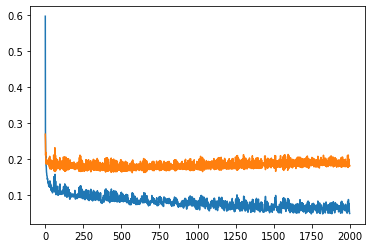

In [44]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.show()

# We now get the RMSE for both train and test sets to see if they differ by much

# Make predictions based on train set and get a root mean squared error 

In [45]:
from sklearn.metrics import mean_squared_error
import math

train_yhat = simple_dense_norm_model.predict(train_X)
mse = mean_squared_error(train_y, train_yhat)
rmse = math.sqrt(mse)

In [46]:
print('Train RMSE: ' + str(rmse))

Train RMSE: 0.09744524860888046


# Make predictions based on test set and get a root mean squared error 

In [47]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = simple_dense_norm_model.predict(test_X)
mse = mean_squared_error(test_y, test_yhat)
rmse = math.sqrt(mse)

In [48]:
print('Test RMSE: ' + str(rmse))

Test RMSE: 0.24327007787907864


# Plot train labels along with train predictions

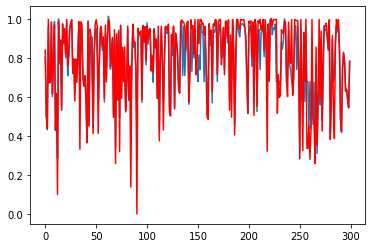

In [49]:
from matplotlib import pyplot

pyplot.plot(train_yhat, label='actual')
pyplot.plot(train_y, color='red', label='predicted')
pyplot.show()

# Plot test labels along with test predictions

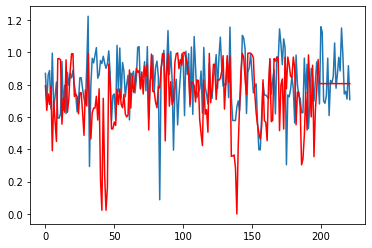

In [50]:
from matplotlib import pyplot

pyplot.plot(test_yhat, label='actual')
pyplot.plot(test_y, color='red', label='predicted')
pyplot.show()

# Start of experiment with normalization of features

In [51]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [52]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [53]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# View one time series

In [54]:
for i in range(22):
    print(list_of_row_components[i])

[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0]
[36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7.3]


# Get length of list of lists

In [55]:
len(list_of_row_components)

11506

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [56]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Convert format of list to have a single time series for each index

In [57]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [58]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

In [59]:
list_of_examples.shape

(522, 22, 7)

# Perform train test split for dataset

In [60]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


# Apply MinMaxScaler on data

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for idx, x in enumerate(train_X):
    train_X[idx] = scaler.fit_transform(x)

train_y = scaler.fit_transform(train_y.reshape(-1,1))

for idx, x in enumerate(test_X):
    test_X[idx] = scaler.fit_transform(x)

test_y = scaler.fit_transform(test_y.reshape(-1,1))

In [62]:
train_y = train_y.reshape(300,)
test_y = test_y.reshape(222,)

In [63]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


# Build simple Dense model

In [64]:
simple_dense_norm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, input_shape=(train_X.shape[1],train_X.shape[2])),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [65]:
from tensorflow import keras

simple_dense_norm_model.compile(loss='mae', optimizer='adam')

# Train model

In [66]:
history = simple_dense_norm_model.fit(train_X, train_y, epochs=2000, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/2000
10/10 - 0s - loss: 0.4241 - val_loss: 0.3373
Epoch 2/2000
10/10 - 0s - loss: 0.3275 - val_loss: 0.2137
Epoch 3/2000
10/10 - 0s - loss: 0.2666 - val_loss: 0.1944
Epoch 4/2000
10/10 - 0s - loss: 0.2284 - val_loss: 0.1887
Epoch 5/2000
10/10 - 0s - loss: 0.2143 - val_loss: 0.1714
Epoch 6/2000
10/10 - 0s - loss: 0.1961 - val_loss: 0.1722
Epoch 7/2000
10/10 - 0s - loss: 0.1873 - val_loss: 0.1753
Epoch 8/2000
10/10 - 0s - loss: 0.1782 - val_loss: 0.1713
Epoch 9/2000
10/10 - 0s - loss: 0.1723 - val_loss: 0.1764
Epoch 10/2000
10/10 - 0s - loss: 0.1699 - val_loss: 0.1704
Epoch 11/2000
10/10 - 0s - loss: 0.1625 - val_loss: 0.1644
Epoch 12/2000
10/10 - 0s - loss: 0.1579 - val_loss: 0.1697
Epoch 13/2000
10/10 - 0s - loss: 0.1570 - val_loss: 0.1733
Epoch 14/2000
10/10 - 0s - loss: 0.1551 - val_loss: 0.1626
Epoch 15/2000
10/10 - 0s - loss: 0.1469 - val_loss: 0.1593
Epoch 16/2000
10/10 - 0s - loss: 0.1437 - val_loss: 0.1667
Epoch 17/2000
10/10 - 0s - loss: 0.1458 - val_loss: 0.1750
Epoch 

Epoch 140/2000
10/10 - 0s - loss: 0.0989 - val_loss: 0.1844
Epoch 141/2000
10/10 - 0s - loss: 0.1044 - val_loss: 0.1722
Epoch 142/2000
10/10 - 0s - loss: 0.1057 - val_loss: 0.1705
Epoch 143/2000
10/10 - 0s - loss: 0.1047 - val_loss: 0.1657
Epoch 144/2000
10/10 - 0s - loss: 0.1000 - val_loss: 0.1699
Epoch 145/2000
10/10 - 0s - loss: 0.1020 - val_loss: 0.1892
Epoch 146/2000
10/10 - 0s - loss: 0.1065 - val_loss: 0.1797
Epoch 147/2000
10/10 - 0s - loss: 0.0982 - val_loss: 0.1744
Epoch 148/2000
10/10 - 0s - loss: 0.0978 - val_loss: 0.1711
Epoch 149/2000
10/10 - 0s - loss: 0.0983 - val_loss: 0.1663
Epoch 150/2000
10/10 - 0s - loss: 0.0972 - val_loss: 0.1662
Epoch 151/2000
10/10 - 0s - loss: 0.1032 - val_loss: 0.1950
Epoch 152/2000
10/10 - 0s - loss: 0.1097 - val_loss: 0.1776
Epoch 153/2000
10/10 - 0s - loss: 0.1008 - val_loss: 0.1709
Epoch 154/2000
10/10 - 0s - loss: 0.0982 - val_loss: 0.1706
Epoch 155/2000
10/10 - 0s - loss: 0.0945 - val_loss: 0.1670
Epoch 156/2000
10/10 - 0s - loss: 0.0985

Epoch 277/2000
10/10 - 0s - loss: 0.1185 - val_loss: 0.1662
Epoch 278/2000
10/10 - 0s - loss: 0.0907 - val_loss: 0.1648
Epoch 279/2000
10/10 - 0s - loss: 0.0889 - val_loss: 0.1658
Epoch 280/2000
10/10 - 0s - loss: 0.0915 - val_loss: 0.1810
Epoch 281/2000
10/10 - 0s - loss: 0.0950 - val_loss: 0.1802
Epoch 282/2000
10/10 - 0s - loss: 0.0828 - val_loss: 0.1774
Epoch 283/2000
10/10 - 0s - loss: 0.0776 - val_loss: 0.1777
Epoch 284/2000
10/10 - 0s - loss: 0.0769 - val_loss: 0.1756
Epoch 285/2000
10/10 - 0s - loss: 0.0766 - val_loss: 0.1710
Epoch 286/2000
10/10 - 0s - loss: 0.0757 - val_loss: 0.1757
Epoch 287/2000
10/10 - 0s - loss: 0.0768 - val_loss: 0.1743
Epoch 288/2000
10/10 - 0s - loss: 0.0769 - val_loss: 0.1787
Epoch 289/2000
10/10 - 0s - loss: 0.0806 - val_loss: 0.1780
Epoch 290/2000
10/10 - 0s - loss: 0.0767 - val_loss: 0.1814
Epoch 291/2000
10/10 - 0s - loss: 0.0771 - val_loss: 0.1787
Epoch 292/2000
10/10 - 0s - loss: 0.0799 - val_loss: 0.1800
Epoch 293/2000
10/10 - 0s - loss: 0.0887

Epoch 414/2000
10/10 - 0s - loss: 0.0856 - val_loss: 0.1725
Epoch 415/2000
10/10 - 0s - loss: 0.0892 - val_loss: 0.1955
Epoch 416/2000
10/10 - 0s - loss: 0.1023 - val_loss: 0.1825
Epoch 417/2000
10/10 - 0s - loss: 0.0955 - val_loss: 0.1705
Epoch 418/2000
10/10 - 0s - loss: 0.0897 - val_loss: 0.1690
Epoch 419/2000
10/10 - 0s - loss: 0.0734 - val_loss: 0.1645
Epoch 420/2000
10/10 - 0s - loss: 0.0744 - val_loss: 0.1626
Epoch 421/2000
10/10 - 0s - loss: 0.0864 - val_loss: 0.1863
Epoch 422/2000
10/10 - 0s - loss: 0.0944 - val_loss: 0.1819
Epoch 423/2000
10/10 - 0s - loss: 0.0869 - val_loss: 0.1806
Epoch 424/2000
10/10 - 0s - loss: 0.0887 - val_loss: 0.1714
Epoch 425/2000
10/10 - 0s - loss: 0.0915 - val_loss: 0.1665
Epoch 426/2000
10/10 - 0s - loss: 0.0851 - val_loss: 0.1747
Epoch 427/2000
10/10 - 0s - loss: 0.0917 - val_loss: 0.1785
Epoch 428/2000
10/10 - 0s - loss: 0.0795 - val_loss: 0.1741
Epoch 429/2000
10/10 - 0s - loss: 0.0684 - val_loss: 0.1759
Epoch 430/2000
10/10 - 0s - loss: 0.0709

Epoch 551/2000
10/10 - 0s - loss: 0.0966 - val_loss: 0.1718
Epoch 552/2000
10/10 - 0s - loss: 0.0898 - val_loss: 0.1716
Epoch 553/2000
10/10 - 0s - loss: 0.0705 - val_loss: 0.1771
Epoch 554/2000
10/10 - 0s - loss: 0.0686 - val_loss: 0.1760
Epoch 555/2000
10/10 - 0s - loss: 0.0650 - val_loss: 0.1774
Epoch 556/2000
10/10 - 0s - loss: 0.0653 - val_loss: 0.1807
Epoch 557/2000
10/10 - 0s - loss: 0.0683 - val_loss: 0.1809
Epoch 558/2000
10/10 - 0s - loss: 0.0847 - val_loss: 0.1728
Epoch 559/2000
10/10 - 0s - loss: 0.0875 - val_loss: 0.1707
Epoch 560/2000
10/10 - 0s - loss: 0.1001 - val_loss: 0.1668
Epoch 561/2000
10/10 - 0s - loss: 0.0867 - val_loss: 0.1792
Epoch 562/2000
10/10 - 0s - loss: 0.0891 - val_loss: 0.1758
Epoch 563/2000
10/10 - 0s - loss: 0.0760 - val_loss: 0.1733
Epoch 564/2000
10/10 - 0s - loss: 0.0814 - val_loss: 0.1688
Epoch 565/2000
10/10 - 0s - loss: 0.0768 - val_loss: 0.1668
Epoch 566/2000
10/10 - 0s - loss: 0.0681 - val_loss: 0.1657
Epoch 567/2000
10/10 - 0s - loss: 0.0683

Epoch 688/2000
10/10 - 0s - loss: 0.0809 - val_loss: 0.1857
Epoch 689/2000
10/10 - 0s - loss: 0.0802 - val_loss: 0.1787
Epoch 690/2000
10/10 - 0s - loss: 0.0889 - val_loss: 0.1706
Epoch 691/2000
10/10 - 0s - loss: 0.0905 - val_loss: 0.1674
Epoch 692/2000
10/10 - 0s - loss: 0.0729 - val_loss: 0.1667
Epoch 693/2000
10/10 - 0s - loss: 0.0741 - val_loss: 0.1768
Epoch 694/2000
10/10 - 0s - loss: 0.0767 - val_loss: 0.1799
Epoch 695/2000
10/10 - 0s - loss: 0.0690 - val_loss: 0.1870
Epoch 696/2000
10/10 - 0s - loss: 0.0801 - val_loss: 0.1769
Epoch 697/2000
10/10 - 0s - loss: 0.0904 - val_loss: 0.1728
Epoch 698/2000
10/10 - 0s - loss: 0.1003 - val_loss: 0.1710
Epoch 699/2000
10/10 - 0s - loss: 0.0813 - val_loss: 0.1827
Epoch 700/2000
10/10 - 0s - loss: 0.0885 - val_loss: 0.1763
Epoch 701/2000
10/10 - 0s - loss: 0.0850 - val_loss: 0.1683
Epoch 702/2000
10/10 - 0s - loss: 0.0850 - val_loss: 0.1688
Epoch 703/2000
10/10 - 0s - loss: 0.0667 - val_loss: 0.1672
Epoch 704/2000
10/10 - 0s - loss: 0.0652

Epoch 825/2000
10/10 - 0s - loss: 0.0852 - val_loss: 0.1699
Epoch 826/2000
10/10 - 0s - loss: 0.0671 - val_loss: 0.1683
Epoch 827/2000
10/10 - 0s - loss: 0.0625 - val_loss: 0.1700
Epoch 828/2000
10/10 - 0s - loss: 0.0589 - val_loss: 0.1689
Epoch 829/2000
10/10 - 0s - loss: 0.0621 - val_loss: 0.1751
Epoch 830/2000
10/10 - 0s - loss: 0.0584 - val_loss: 0.1721
Epoch 831/2000
10/10 - 0s - loss: 0.0620 - val_loss: 0.1730
Epoch 832/2000
10/10 - 0s - loss: 0.0612 - val_loss: 0.1697
Epoch 833/2000
10/10 - 0s - loss: 0.0636 - val_loss: 0.1724
Epoch 834/2000
10/10 - 0s - loss: 0.0631 - val_loss: 0.1699
Epoch 835/2000
10/10 - 0s - loss: 0.0737 - val_loss: 0.1649
Epoch 836/2000
10/10 - 0s - loss: 0.0777 - val_loss: 0.1655
Epoch 837/2000
10/10 - 0s - loss: 0.0948 - val_loss: 0.1869
Epoch 838/2000
10/10 - 0s - loss: 0.0929 - val_loss: 0.1664
Epoch 839/2000
10/10 - 0s - loss: 0.0614 - val_loss: 0.1703
Epoch 840/2000
10/10 - 0s - loss: 0.0628 - val_loss: 0.1667
Epoch 841/2000
10/10 - 0s - loss: 0.0617

Epoch 962/2000
10/10 - 0s - loss: 0.0809 - val_loss: 0.1800
Epoch 963/2000
10/10 - 0s - loss: 0.0732 - val_loss: 0.1716
Epoch 964/2000
10/10 - 0s - loss: 0.0580 - val_loss: 0.1790
Epoch 965/2000
10/10 - 0s - loss: 0.0559 - val_loss: 0.1738
Epoch 966/2000
10/10 - 0s - loss: 0.0583 - val_loss: 0.1681
Epoch 967/2000
10/10 - 0s - loss: 0.0592 - val_loss: 0.1708
Epoch 968/2000
10/10 - 0s - loss: 0.0619 - val_loss: 0.1648
Epoch 969/2000
10/10 - 0s - loss: 0.0679 - val_loss: 0.1628
Epoch 970/2000
10/10 - 0s - loss: 0.0677 - val_loss: 0.1625
Epoch 971/2000
10/10 - 0s - loss: 0.0876 - val_loss: 0.1866
Epoch 972/2000
10/10 - 0s - loss: 0.1015 - val_loss: 0.1644
Epoch 973/2000
10/10 - 0s - loss: 0.0642 - val_loss: 0.1683
Epoch 974/2000
10/10 - 0s - loss: 0.0664 - val_loss: 0.1643
Epoch 975/2000
10/10 - 0s - loss: 0.0647 - val_loss: 0.1621
Epoch 976/2000
10/10 - 0s - loss: 0.0860 - val_loss: 0.1857
Epoch 977/2000
10/10 - 0s - loss: 0.0875 - val_loss: 0.1695
Epoch 978/2000
10/10 - 0s - loss: 0.0595

Epoch 1097/2000
10/10 - 0s - loss: 0.0601 - val_loss: 0.1656
Epoch 1098/2000
10/10 - 0s - loss: 0.0605 - val_loss: 0.1670
Epoch 1099/2000
10/10 - 0s - loss: 0.0677 - val_loss: 0.1643
Epoch 1100/2000
10/10 - 0s - loss: 0.0730 - val_loss: 0.1712
Epoch 1101/2000
10/10 - 0s - loss: 0.0733 - val_loss: 0.1784
Epoch 1102/2000
10/10 - 0s - loss: 0.0678 - val_loss: 0.1790
Epoch 1103/2000
10/10 - 0s - loss: 0.0547 - val_loss: 0.1719
Epoch 1104/2000
10/10 - 0s - loss: 0.0531 - val_loss: 0.1741
Epoch 1105/2000
10/10 - 0s - loss: 0.0536 - val_loss: 0.1694
Epoch 1106/2000
10/10 - 0s - loss: 0.0583 - val_loss: 0.1770
Epoch 1107/2000
10/10 - 0s - loss: 0.0533 - val_loss: 0.1686
Epoch 1108/2000
10/10 - 0s - loss: 0.0576 - val_loss: 0.1783
Epoch 1109/2000
10/10 - 0s - loss: 0.0541 - val_loss: 0.1708
Epoch 1110/2000
10/10 - 0s - loss: 0.0589 - val_loss: 0.1771
Epoch 1111/2000
10/10 - 0s - loss: 0.0539 - val_loss: 0.1703
Epoch 1112/2000
10/10 - 0s - loss: 0.0592 - val_loss: 0.1771
Epoch 1113/2000
10/10 - 

Epoch 1232/2000
10/10 - 0s - loss: 0.0748 - val_loss: 0.1914
Epoch 1233/2000
10/10 - 0s - loss: 0.0863 - val_loss: 0.1772
Epoch 1234/2000
10/10 - 0s - loss: 0.0801 - val_loss: 0.1725
Epoch 1235/2000
10/10 - 0s - loss: 0.0745 - val_loss: 0.1706
Epoch 1236/2000
10/10 - 0s - loss: 0.0593 - val_loss: 0.1645
Epoch 1237/2000
10/10 - 0s - loss: 0.0735 - val_loss: 0.1821
Epoch 1238/2000
10/10 - 0s - loss: 0.0908 - val_loss: 0.1705
Epoch 1239/2000
10/10 - 0s - loss: 0.0718 - val_loss: 0.1720
Epoch 1240/2000
10/10 - 0s - loss: 0.0606 - val_loss: 0.1707
Epoch 1241/2000
10/10 - 0s - loss: 0.0546 - val_loss: 0.1666
Epoch 1242/2000
10/10 - 0s - loss: 0.0514 - val_loss: 0.1662
Epoch 1243/2000
10/10 - 0s - loss: 0.0488 - val_loss: 0.1667
Epoch 1244/2000
10/10 - 0s - loss: 0.0560 - val_loss: 0.1646
Epoch 1245/2000
10/10 - 0s - loss: 0.0541 - val_loss: 0.1635
Epoch 1246/2000
10/10 - 0s - loss: 0.0671 - val_loss: 0.1683
Epoch 1247/2000
10/10 - 0s - loss: 0.0760 - val_loss: 0.1940
Epoch 1248/2000
10/10 - 

Epoch 1367/2000
10/10 - 0s - loss: 0.0501 - val_loss: 0.1643
Epoch 1368/2000
10/10 - 0s - loss: 0.0525 - val_loss: 0.1628
Epoch 1369/2000
10/10 - 0s - loss: 0.0681 - val_loss: 0.1796
Epoch 1370/2000
10/10 - 0s - loss: 0.0850 - val_loss: 0.1775
Epoch 1371/2000
10/10 - 0s - loss: 0.0782 - val_loss: 0.1722
Epoch 1372/2000
10/10 - 0s - loss: 0.0654 - val_loss: 0.1722
Epoch 1373/2000
10/10 - 0s - loss: 0.0511 - val_loss: 0.1736
Epoch 1374/2000
10/10 - 0s - loss: 0.0529 - val_loss: 0.1656
Epoch 1375/2000
10/10 - 0s - loss: 0.0523 - val_loss: 0.1648
Epoch 1376/2000
10/10 - 0s - loss: 0.0526 - val_loss: 0.1661
Epoch 1377/2000
10/10 - 0s - loss: 0.0573 - val_loss: 0.1663
Epoch 1378/2000
10/10 - 0s - loss: 0.0690 - val_loss: 0.1902
Epoch 1379/2000
10/10 - 0s - loss: 0.0841 - val_loss: 0.1805
Epoch 1380/2000
10/10 - 0s - loss: 0.0767 - val_loss: 0.1743
Epoch 1381/2000
10/10 - 0s - loss: 0.0696 - val_loss: 0.1718
Epoch 1382/2000
10/10 - 0s - loss: 0.0574 - val_loss: 0.1708
Epoch 1383/2000
10/10 - 

Epoch 1502/2000
10/10 - 0s - loss: 0.0653 - val_loss: 0.1696
Epoch 1503/2000
10/10 - 0s - loss: 0.0699 - val_loss: 0.1699
Epoch 1504/2000
10/10 - 0s - loss: 0.0632 - val_loss: 0.1675
Epoch 1505/2000
10/10 - 0s - loss: 0.0649 - val_loss: 0.1685
Epoch 1506/2000
10/10 - 0s - loss: 0.0641 - val_loss: 0.1758
Epoch 1507/2000
10/10 - 0s - loss: 0.0631 - val_loss: 0.1780
Epoch 1508/2000
10/10 - 0s - loss: 0.0530 - val_loss: 0.1772
Epoch 1509/2000
10/10 - 0s - loss: 0.0502 - val_loss: 0.1797
Epoch 1510/2000
10/10 - 0s - loss: 0.0547 - val_loss: 0.1838
Epoch 1511/2000
10/10 - 0s - loss: 0.0663 - val_loss: 0.1714
Epoch 1512/2000
10/10 - 0s - loss: 0.0742 - val_loss: 0.1706
Epoch 1513/2000
10/10 - 0s - loss: 0.0629 - val_loss: 0.1679
Epoch 1514/2000
10/10 - 0s - loss: 0.0546 - val_loss: 0.1649
Epoch 1515/2000
10/10 - 0s - loss: 0.0531 - val_loss: 0.1653
Epoch 1516/2000
10/10 - 0s - loss: 0.0531 - val_loss: 0.1701
Epoch 1517/2000
10/10 - 0s - loss: 0.0517 - val_loss: 0.1657
Epoch 1518/2000
10/10 - 

Epoch 1637/2000
10/10 - 0s - loss: 0.0559 - val_loss: 0.1646
Epoch 1638/2000
10/10 - 0s - loss: 0.0559 - val_loss: 0.1659
Epoch 1639/2000
10/10 - 0s - loss: 0.0629 - val_loss: 0.1736
Epoch 1640/2000
10/10 - 0s - loss: 0.0733 - val_loss: 0.1861
Epoch 1641/2000
10/10 - 0s - loss: 0.0760 - val_loss: 0.1812
Epoch 1642/2000
10/10 - 0s - loss: 0.0663 - val_loss: 0.1800
Epoch 1643/2000
10/10 - 0s - loss: 0.0607 - val_loss: 0.1769
Epoch 1644/2000
10/10 - 0s - loss: 0.0570 - val_loss: 0.1711
Epoch 1645/2000
10/10 - 0s - loss: 0.0539 - val_loss: 0.1710
Epoch 1646/2000
10/10 - 0s - loss: 0.0485 - val_loss: 0.1673
Epoch 1647/2000
10/10 - 0s - loss: 0.0460 - val_loss: 0.1675
Epoch 1648/2000
10/10 - 0s - loss: 0.0457 - val_loss: 0.1684
Epoch 1649/2000
10/10 - 0s - loss: 0.0507 - val_loss: 0.1685
Epoch 1650/2000
10/10 - 0s - loss: 0.0452 - val_loss: 0.1656
Epoch 1651/2000
10/10 - 0s - loss: 0.0460 - val_loss: 0.1660
Epoch 1652/2000
10/10 - 0s - loss: 0.0596 - val_loss: 0.1650
Epoch 1653/2000
10/10 - 

Epoch 1772/2000
10/10 - 0s - loss: 0.0470 - val_loss: 0.1811
Epoch 1773/2000
10/10 - 0s - loss: 0.0472 - val_loss: 0.1736
Epoch 1774/2000
10/10 - 0s - loss: 0.0458 - val_loss: 0.1795
Epoch 1775/2000
10/10 - 0s - loss: 0.0492 - val_loss: 0.1796
Epoch 1776/2000
10/10 - 0s - loss: 0.0632 - val_loss: 0.1724
Epoch 1777/2000
10/10 - 0s - loss: 0.0634 - val_loss: 0.1730
Epoch 1778/2000
10/10 - 0s - loss: 0.0706 - val_loss: 0.1712
Epoch 1779/2000
10/10 - 0s - loss: 0.0741 - val_loss: 0.1670
Epoch 1780/2000
10/10 - 0s - loss: 0.0845 - val_loss: 0.1860
Epoch 1781/2000
10/10 - 0s - loss: 0.0874 - val_loss: 0.1666
Epoch 1782/2000
10/10 - 0s - loss: 0.0596 - val_loss: 0.1713
Epoch 1783/2000
10/10 - 0s - loss: 0.0657 - val_loss: 0.1696
Epoch 1784/2000
10/10 - 0s - loss: 0.0650 - val_loss: 0.1671
Epoch 1785/2000
10/10 - 0s - loss: 0.0732 - val_loss: 0.1787
Epoch 1786/2000
10/10 - 0s - loss: 0.0687 - val_loss: 0.1724
Epoch 1787/2000
10/10 - 0s - loss: 0.0520 - val_loss: 0.1741
Epoch 1788/2000
10/10 - 

Epoch 1907/2000
10/10 - 0s - loss: 0.0425 - val_loss: 0.1724
Epoch 1908/2000
10/10 - 0s - loss: 0.0444 - val_loss: 0.1691
Epoch 1909/2000
10/10 - 0s - loss: 0.0515 - val_loss: 0.1779
Epoch 1910/2000
10/10 - 0s - loss: 0.0493 - val_loss: 0.1691
Epoch 1911/2000
10/10 - 0s - loss: 0.0502 - val_loss: 0.1782
Epoch 1912/2000
10/10 - 0s - loss: 0.0485 - val_loss: 0.1706
Epoch 1913/2000
10/10 - 0s - loss: 0.0473 - val_loss: 0.1783
Epoch 1914/2000
10/10 - 0s - loss: 0.0468 - val_loss: 0.1721
Epoch 1915/2000
10/10 - 0s - loss: 0.0463 - val_loss: 0.1757
Epoch 1916/2000
10/10 - 0s - loss: 0.0469 - val_loss: 0.1735
Epoch 1917/2000
10/10 - 0s - loss: 0.0540 - val_loss: 0.1817
Epoch 1918/2000
10/10 - 0s - loss: 0.0522 - val_loss: 0.1724
Epoch 1919/2000
10/10 - 0s - loss: 0.0461 - val_loss: 0.1820
Epoch 1920/2000
10/10 - 0s - loss: 0.0484 - val_loss: 0.1740
Epoch 1921/2000
10/10 - 0s - loss: 0.0547 - val_loss: 0.1851
Epoch 1922/2000
10/10 - 0s - loss: 0.0559 - val_loss: 0.1836
Epoch 1923/2000
10/10 - 

# Plot model loss and validation loss

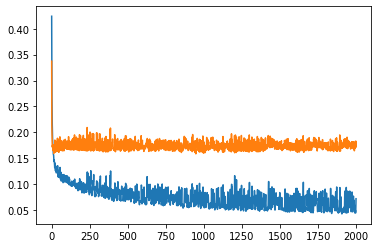

In [67]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.show()

# We now get the RMSE for both train and test sets to see if they differ by much

# Make predictions based on train set and get a root mean squared error 

In [68]:
from sklearn.metrics import mean_squared_error
import math

train_yhat = simple_dense_norm_model.predict(train_X)
mse = mean_squared_error(train_y, train_yhat)
rmse = math.sqrt(mse)

In [69]:
print('Train RMSE: ' + str(rmse))

Train RMSE: 0.11359446897665315


# Make predictions based on test set and get a root mean squared error 

In [70]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = simple_dense_norm_model.predict(test_X)
mse = mean_squared_error(test_y, test_yhat)
rmse = math.sqrt(mse)

In [71]:
print('Test RMSE: ' + str(rmse))

Test RMSE: 0.23044018461667856


# Plot train labels along with train predictions

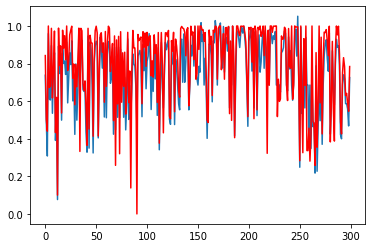

In [72]:
from matplotlib import pyplot

pyplot.plot(train_yhat, label='actual')
pyplot.plot(train_y, color='red', label='predicted')
pyplot.show()

# Plot test labels along with test predictions

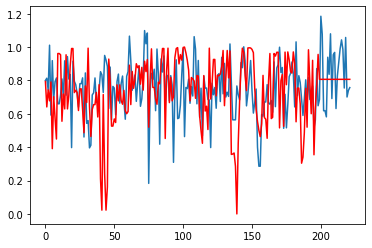

In [73]:
from matplotlib import pyplot

pyplot.plot(test_yhat, label='actual')
pyplot.plot(test_y, color='red', label='predicted')
pyplot.show()

# Start of experiment with both the addition of weather data and normalization

In [74]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [75]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []
        
        current_row_components_replaced.append(bridge_id)

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Append the weather data to the end of each time step

In [76]:
start_year = 1998
last_year = 2019

rows = []

df_NOAA = read_csv('NBI_NOAA_Integrated.csv')

for i, example in enumerate(list_of_row_components):
        
        row = df_NOAA.loc[(df_NOAA['STRUCTURE_NUMBER_008'] == list_of_row_components[i][0]) & (df_NOAA['EVALUATION_YEAR'] == start_year)]
        
        if len(row) == 0:
            row = prev_row
        
        for idx, r in row.iterrows():  
            list_of_row_components[i].append(r['prcp_avg'])
            list_of_row_components[i].append(r['snow_avg'])
            list_of_row_components[i].append(r['snwd_avg'])
        
        start_year += 1
        
        if start_year > last_year:
            start_year = 1998
            
        prev_row = row
        prev_row['EVALUATION_YEAR'] = start_year
        

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (19,33,38,39,40,41,43,71,78,81,104,108,109,110,111,116,132,135) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tobby\Anaconda3\envs\tf_bridge_management\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

# Ensure each element in the list of lists is a float

In [77]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [78]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Remove the bridge id's from each time series

In [79]:
for idx, element in enumerate(list_of_row_components):
    list_of_row_components[idx].pop(0)

# View one time series

In [80]:
for i in range(22):
    print(len(list_of_row_components[i]))

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


# Get length of list of lists

In [81]:
len(list_of_row_components)

11506

# Convert format of list to have a single time series for each index

In [82]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [83]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

In [84]:
list_of_examples.shape

(522, 22, 10)

# Perform train test split for dataset

In [85]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


# Apply MinMaxScaler on data

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for idx, x in enumerate(train_X):
    train_X[idx] = scaler.fit_transform(x)

train_y = scaler.fit_transform(train_y.reshape(-1,1))

for idx, x in enumerate(test_X):
    test_X[idx] = scaler.fit_transform(x)

test_y = scaler.fit_transform(test_y.reshape(-1,1))

In [87]:
train_y = train_y.reshape(300,)
test_y = test_y.reshape(222,)

In [88]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 9)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 9)
Shape of test_y: (222,)


# Build simple Dense model

In [89]:
simple_dense_weather_norm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, input_shape=(train_X.shape[1],train_X.shape[2])),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [90]:
from tensorflow import keras

simple_dense_weather_norm_model.compile(loss='mae', optimizer='adam')

# Train model

In [91]:
history = simple_dense_weather_norm_model.fit(train_X, train_y, epochs=2000, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/2000
10/10 - 0s - loss: 0.3222 - val_loss: 0.2909
Epoch 2/2000
10/10 - 0s - loss: 0.2396 - val_loss: 0.2057
Epoch 3/2000
10/10 - 0s - loss: 0.1657 - val_loss: 0.1630
Epoch 4/2000
10/10 - 0s - loss: 0.1509 - val_loss: 0.1561
Epoch 5/2000
10/10 - 0s - loss: 0.1310 - val_loss: 0.1487
Epoch 6/2000
10/10 - 0s - loss: 0.1264 - val_loss: 0.1464
Epoch 7/2000
10/10 - 0s - loss: 0.1243 - val_loss: 0.1451
Epoch 8/2000
10/10 - 0s - loss: 0.1210 - val_loss: 0.1462
Epoch 9/2000
10/10 - 0s - loss: 0.1161 - val_loss: 0.1449
Epoch 10/2000
10/10 - 0s - loss: 0.1147 - val_loss: 0.1436
Epoch 11/2000
10/10 - 0s - loss: 0.1151 - val_loss: 0.1430
Epoch 12/2000
10/10 - 0s - loss: 0.1139 - val_loss: 0.1424
Epoch 13/2000
10/10 - 0s - loss: 0.1147 - val_loss: 0.1487
Epoch 14/2000
10/10 - 0s - loss: 0.1113 - val_loss: 0.1545
Epoch 15/2000
10/10 - 0s - loss: 0.1071 - val_loss: 0.1522
Epoch 16/2000
10/10 - 0s - loss: 0.1092 - val_loss: 0.1423
Epoch 17/2000
10/10 - 0s - loss: 0.1112 - val_loss: 0.1436
Epoch 

Epoch 140/2000
10/10 - 0s - loss: 0.0757 - val_loss: 0.1591
Epoch 141/2000
10/10 - 0s - loss: 0.0770 - val_loss: 0.1642
Epoch 142/2000
10/10 - 0s - loss: 0.0790 - val_loss: 0.1552
Epoch 143/2000
10/10 - 0s - loss: 0.0862 - val_loss: 0.1535
Epoch 144/2000
10/10 - 0s - loss: 0.0932 - val_loss: 0.1486
Epoch 145/2000
10/10 - 0s - loss: 0.0801 - val_loss: 0.1565
Epoch 146/2000
10/10 - 0s - loss: 0.0781 - val_loss: 0.1621
Epoch 147/2000
10/10 - 0s - loss: 0.0776 - val_loss: 0.1535
Epoch 148/2000
10/10 - 0s - loss: 0.0841 - val_loss: 0.1542
Epoch 149/2000
10/10 - 0s - loss: 0.0883 - val_loss: 0.1504
Epoch 150/2000
10/10 - 0s - loss: 0.0772 - val_loss: 0.1598
Epoch 151/2000
10/10 - 0s - loss: 0.0786 - val_loss: 0.1576
Epoch 152/2000
10/10 - 0s - loss: 0.0732 - val_loss: 0.1471
Epoch 153/2000
10/10 - 0s - loss: 0.0804 - val_loss: 0.1489
Epoch 154/2000
10/10 - 0s - loss: 0.0779 - val_loss: 0.1504
Epoch 155/2000
10/10 - 0s - loss: 0.0750 - val_loss: 0.1580
Epoch 156/2000
10/10 - 0s - loss: 0.0759

Epoch 277/2000
10/10 - 0s - loss: 0.0726 - val_loss: 0.1536
Epoch 278/2000
10/10 - 0s - loss: 0.0751 - val_loss: 0.1534
Epoch 279/2000
10/10 - 0s - loss: 0.0665 - val_loss: 0.1578
Epoch 280/2000
10/10 - 0s - loss: 0.0615 - val_loss: 0.1626
Epoch 281/2000
10/10 - 0s - loss: 0.0564 - val_loss: 0.1569
Epoch 282/2000
10/10 - 0s - loss: 0.0557 - val_loss: 0.1553
Epoch 283/2000
10/10 - 0s - loss: 0.0676 - val_loss: 0.1489
Epoch 284/2000
10/10 - 0s - loss: 0.0684 - val_loss: 0.1527
Epoch 285/2000
10/10 - 0s - loss: 0.0705 - val_loss: 0.1512
Epoch 286/2000
10/10 - 0s - loss: 0.0575 - val_loss: 0.1532
Epoch 287/2000
10/10 - 0s - loss: 0.0526 - val_loss: 0.1521
Epoch 288/2000
10/10 - 0s - loss: 0.0489 - val_loss: 0.1524
Epoch 289/2000
10/10 - 0s - loss: 0.0498 - val_loss: 0.1564
Epoch 290/2000
10/10 - 0s - loss: 0.0525 - val_loss: 0.1578
Epoch 291/2000
10/10 - 0s - loss: 0.0617 - val_loss: 0.1525
Epoch 292/2000
10/10 - 0s - loss: 0.0683 - val_loss: 0.1544
Epoch 293/2000
10/10 - 0s - loss: 0.0745

Epoch 414/2000
10/10 - 0s - loss: 0.0450 - val_loss: 0.1526
Epoch 415/2000
10/10 - 0s - loss: 0.0458 - val_loss: 0.1515
Epoch 416/2000
10/10 - 0s - loss: 0.0482 - val_loss: 0.1500
Epoch 417/2000
10/10 - 0s - loss: 0.0562 - val_loss: 0.1557
Epoch 418/2000
10/10 - 0s - loss: 0.0746 - val_loss: 0.1533
Epoch 419/2000
10/10 - 0s - loss: 0.0813 - val_loss: 0.1634
Epoch 420/2000
10/10 - 0s - loss: 0.0670 - val_loss: 0.1559
Epoch 421/2000
10/10 - 0s - loss: 0.0465 - val_loss: 0.1487
Epoch 422/2000
10/10 - 0s - loss: 0.0452 - val_loss: 0.1502
Epoch 423/2000
10/10 - 0s - loss: 0.0455 - val_loss: 0.1495
Epoch 424/2000
10/10 - 0s - loss: 0.0414 - val_loss: 0.1486
Epoch 425/2000
10/10 - 0s - loss: 0.0459 - val_loss: 0.1519
Epoch 426/2000
10/10 - 0s - loss: 0.0441 - val_loss: 0.1497
Epoch 427/2000
10/10 - 0s - loss: 0.0504 - val_loss: 0.1520
Epoch 428/2000
10/10 - 0s - loss: 0.0541 - val_loss: 0.1520
Epoch 429/2000
10/10 - 0s - loss: 0.0697 - val_loss: 0.1648
Epoch 430/2000
10/10 - 0s - loss: 0.0731

Epoch 551/2000
10/10 - 0s - loss: 0.0440 - val_loss: 0.1518
Epoch 552/2000
10/10 - 0s - loss: 0.0451 - val_loss: 0.1548
Epoch 553/2000
10/10 - 0s - loss: 0.0525 - val_loss: 0.1552
Epoch 554/2000
10/10 - 0s - loss: 0.0805 - val_loss: 0.1591
Epoch 555/2000
10/10 - 0s - loss: 0.0819 - val_loss: 0.1485
Epoch 556/2000
10/10 - 0s - loss: 0.0440 - val_loss: 0.1522
Epoch 557/2000
10/10 - 0s - loss: 0.0470 - val_loss: 0.1525
Epoch 558/2000
10/10 - 0s - loss: 0.0453 - val_loss: 0.1521
Epoch 559/2000
10/10 - 0s - loss: 0.0636 - val_loss: 0.1473
Epoch 560/2000
10/10 - 0s - loss: 0.0615 - val_loss: 0.1503
Epoch 561/2000
10/10 - 0s - loss: 0.0574 - val_loss: 0.1507
Epoch 562/2000
10/10 - 0s - loss: 0.0449 - val_loss: 0.1504
Epoch 563/2000
10/10 - 0s - loss: 0.0395 - val_loss: 0.1493
Epoch 564/2000
10/10 - 0s - loss: 0.0408 - val_loss: 0.1505
Epoch 565/2000
10/10 - 0s - loss: 0.0441 - val_loss: 0.1510
Epoch 566/2000
10/10 - 0s - loss: 0.0401 - val_loss: 0.1509
Epoch 567/2000
10/10 - 0s - loss: 0.0446

Epoch 688/2000
10/10 - 0s - loss: 0.0434 - val_loss: 0.1482
Epoch 689/2000
10/10 - 0s - loss: 0.0369 - val_loss: 0.1498
Epoch 690/2000
10/10 - 0s - loss: 0.0403 - val_loss: 0.1508
Epoch 691/2000
10/10 - 0s - loss: 0.0526 - val_loss: 0.1550
Epoch 692/2000
10/10 - 0s - loss: 0.0616 - val_loss: 0.1554
Epoch 693/2000
10/10 - 0s - loss: 0.0596 - val_loss: 0.1487
Epoch 694/2000
10/10 - 0s - loss: 0.0576 - val_loss: 0.1443
Epoch 695/2000
10/10 - 0s - loss: 0.0455 - val_loss: 0.1476
Epoch 696/2000
10/10 - 0s - loss: 0.0386 - val_loss: 0.1489
Epoch 697/2000
10/10 - 0s - loss: 0.0453 - val_loss: 0.1499
Epoch 698/2000
10/10 - 0s - loss: 0.0593 - val_loss: 0.1610
Epoch 699/2000
10/10 - 0s - loss: 0.0713 - val_loss: 0.1510
Epoch 700/2000
10/10 - 0s - loss: 0.0579 - val_loss: 0.1452
Epoch 701/2000
10/10 - 0s - loss: 0.0481 - val_loss: 0.1464
Epoch 702/2000
10/10 - 0s - loss: 0.0373 - val_loss: 0.1506
Epoch 703/2000
10/10 - 0s - loss: 0.0410 - val_loss: 0.1505
Epoch 704/2000
10/10 - 0s - loss: 0.0524

Epoch 825/2000
10/10 - 0s - loss: 0.0574 - val_loss: 0.1452
Epoch 826/2000
10/10 - 0s - loss: 0.0486 - val_loss: 0.1465
Epoch 827/2000
10/10 - 0s - loss: 0.0374 - val_loss: 0.1487
Epoch 828/2000
10/10 - 0s - loss: 0.0365 - val_loss: 0.1492
Epoch 829/2000
10/10 - 0s - loss: 0.0379 - val_loss: 0.1491
Epoch 830/2000
10/10 - 0s - loss: 0.0408 - val_loss: 0.1498
Epoch 831/2000
10/10 - 0s - loss: 0.0482 - val_loss: 0.1557
Epoch 832/2000
10/10 - 0s - loss: 0.0583 - val_loss: 0.1533
Epoch 833/2000
10/10 - 0s - loss: 0.0644 - val_loss: 0.1451
Epoch 834/2000
10/10 - 0s - loss: 0.0519 - val_loss: 0.1468
Epoch 835/2000
10/10 - 0s - loss: 0.0427 - val_loss: 0.1487
Epoch 836/2000
10/10 - 0s - loss: 0.0369 - val_loss: 0.1489
Epoch 837/2000
10/10 - 0s - loss: 0.0363 - val_loss: 0.1505
Epoch 838/2000
10/10 - 0s - loss: 0.0361 - val_loss: 0.1491
Epoch 839/2000
10/10 - 0s - loss: 0.0373 - val_loss: 0.1497
Epoch 840/2000
10/10 - 0s - loss: 0.0358 - val_loss: 0.1497
Epoch 841/2000
10/10 - 0s - loss: 0.0448

Epoch 962/2000
10/10 - 0s - loss: 0.0449 - val_loss: 0.1494
Epoch 963/2000
10/10 - 0s - loss: 0.0571 - val_loss: 0.1514
Epoch 964/2000
10/10 - 0s - loss: 0.0647 - val_loss: 0.1496
Epoch 965/2000
10/10 - 0s - loss: 0.0470 - val_loss: 0.1513
Epoch 966/2000
10/10 - 0s - loss: 0.0399 - val_loss: 0.1485
Epoch 967/2000
10/10 - 0s - loss: 0.0323 - val_loss: 0.1474
Epoch 968/2000
10/10 - 0s - loss: 0.0345 - val_loss: 0.1501
Epoch 969/2000
10/10 - 0s - loss: 0.0331 - val_loss: 0.1484
Epoch 970/2000
10/10 - 0s - loss: 0.0313 - val_loss: 0.1495
Epoch 971/2000
10/10 - 0s - loss: 0.0341 - val_loss: 0.1505
Epoch 972/2000
10/10 - 0s - loss: 0.0337 - val_loss: 0.1496
Epoch 973/2000
10/10 - 0s - loss: 0.0354 - val_loss: 0.1521
Epoch 974/2000
10/10 - 0s - loss: 0.0486 - val_loss: 0.1478
Epoch 975/2000
10/10 - 0s - loss: 0.0598 - val_loss: 0.1577
Epoch 976/2000
10/10 - 0s - loss: 0.0790 - val_loss: 0.1515
Epoch 977/2000
10/10 - 0s - loss: 0.0479 - val_loss: 0.1523
Epoch 978/2000
10/10 - 0s - loss: 0.0401

Epoch 1097/2000
10/10 - 0s - loss: 0.0358 - val_loss: 0.1463
Epoch 1098/2000
10/10 - 0s - loss: 0.0327 - val_loss: 0.1483
Epoch 1099/2000
10/10 - 0s - loss: 0.0357 - val_loss: 0.1479
Epoch 1100/2000
10/10 - 0s - loss: 0.0354 - val_loss: 0.1485
Epoch 1101/2000
10/10 - 0s - loss: 0.0405 - val_loss: 0.1505
Epoch 1102/2000
10/10 - 0s - loss: 0.0524 - val_loss: 0.1533
Epoch 1103/2000
10/10 - 0s - loss: 0.0771 - val_loss: 0.1662
Epoch 1104/2000
10/10 - 0s - loss: 0.0724 - val_loss: 0.1497
Epoch 1105/2000
10/10 - 0s - loss: 0.0361 - val_loss: 0.1460
Epoch 1106/2000
10/10 - 0s - loss: 0.0435 - val_loss: 0.1497
Epoch 1107/2000
10/10 - 0s - loss: 0.0473 - val_loss: 0.1492
Epoch 1108/2000
10/10 - 0s - loss: 0.0508 - val_loss: 0.1529
Epoch 1109/2000
10/10 - 0s - loss: 0.0504 - val_loss: 0.1530
Epoch 1110/2000
10/10 - 0s - loss: 0.0462 - val_loss: 0.1481
Epoch 1111/2000
10/10 - 0s - loss: 0.0384 - val_loss: 0.1470
Epoch 1112/2000
10/10 - 0s - loss: 0.0311 - val_loss: 0.1494
Epoch 1113/2000
10/10 - 

Epoch 1232/2000
10/10 - 0s - loss: 0.0435 - val_loss: 0.1522
Epoch 1233/2000
10/10 - 0s - loss: 0.0356 - val_loss: 0.1494
Epoch 1234/2000
10/10 - 0s - loss: 0.0299 - val_loss: 0.1484
Epoch 1235/2000
10/10 - 0s - loss: 0.0282 - val_loss: 0.1492
Epoch 1236/2000
10/10 - 0s - loss: 0.0304 - val_loss: 0.1493
Epoch 1237/2000
10/10 - 0s - loss: 0.0306 - val_loss: 0.1503
Epoch 1238/2000
10/10 - 0s - loss: 0.0308 - val_loss: 0.1509
Epoch 1239/2000
10/10 - 0s - loss: 0.0276 - val_loss: 0.1523
Epoch 1240/2000
10/10 - 0s - loss: 0.0282 - val_loss: 0.1509
Epoch 1241/2000
10/10 - 0s - loss: 0.0331 - val_loss: 0.1512
Epoch 1242/2000
10/10 - 0s - loss: 0.0302 - val_loss: 0.1534
Epoch 1243/2000
10/10 - 0s - loss: 0.0361 - val_loss: 0.1534
Epoch 1244/2000
10/10 - 0s - loss: 0.0351 - val_loss: 0.1524
Epoch 1245/2000
10/10 - 0s - loss: 0.0521 - val_loss: 0.1525
Epoch 1246/2000
10/10 - 0s - loss: 0.0642 - val_loss: 0.1519
Epoch 1247/2000
10/10 - 0s - loss: 0.0602 - val_loss: 0.1524
Epoch 1248/2000
10/10 - 

Epoch 1367/2000
10/10 - 0s - loss: 0.0295 - val_loss: 0.1502
Epoch 1368/2000
10/10 - 0s - loss: 0.0259 - val_loss: 0.1501
Epoch 1369/2000
10/10 - 0s - loss: 0.0258 - val_loss: 0.1516
Epoch 1370/2000
10/10 - 0s - loss: 0.0274 - val_loss: 0.1523
Epoch 1371/2000
10/10 - 0s - loss: 0.0289 - val_loss: 0.1515
Epoch 1372/2000
10/10 - 0s - loss: 0.0328 - val_loss: 0.1506
Epoch 1373/2000
10/10 - 0s - loss: 0.0263 - val_loss: 0.1527
Epoch 1374/2000
10/10 - 0s - loss: 0.0313 - val_loss: 0.1519
Epoch 1375/2000
10/10 - 0s - loss: 0.0382 - val_loss: 0.1542
Epoch 1376/2000
10/10 - 0s - loss: 0.0495 - val_loss: 0.1565
Epoch 1377/2000
10/10 - 0s - loss: 0.0627 - val_loss: 0.1558
Epoch 1378/2000
10/10 - 0s - loss: 0.0539 - val_loss: 0.1562
Epoch 1379/2000
10/10 - 0s - loss: 0.0476 - val_loss: 0.1507
Epoch 1380/2000
10/10 - 0s - loss: 0.0359 - val_loss: 0.1479
Epoch 1381/2000
10/10 - 0s - loss: 0.0279 - val_loss: 0.1500
Epoch 1382/2000
10/10 - 0s - loss: 0.0255 - val_loss: 0.1508
Epoch 1383/2000
10/10 - 

Epoch 1502/2000
10/10 - 0s - loss: 0.0682 - val_loss: 0.1501
Epoch 1503/2000
10/10 - 0s - loss: 0.0434 - val_loss: 0.1484
Epoch 1504/2000
10/10 - 0s - loss: 0.0310 - val_loss: 0.1503
Epoch 1505/2000
10/10 - 0s - loss: 0.0314 - val_loss: 0.1512
Epoch 1506/2000
10/10 - 0s - loss: 0.0367 - val_loss: 0.1515
Epoch 1507/2000
10/10 - 0s - loss: 0.0448 - val_loss: 0.1577
Epoch 1508/2000
10/10 - 0s - loss: 0.0638 - val_loss: 0.1483
Epoch 1509/2000
10/10 - 0s - loss: 0.0530 - val_loss: 0.1486
Epoch 1510/2000
10/10 - 0s - loss: 0.0440 - val_loss: 0.1500
Epoch 1511/2000
10/10 - 0s - loss: 0.0326 - val_loss: 0.1503
Epoch 1512/2000
10/10 - 0s - loss: 0.0285 - val_loss: 0.1507
Epoch 1513/2000
10/10 - 0s - loss: 0.0271 - val_loss: 0.1507
Epoch 1514/2000
10/10 - 0s - loss: 0.0272 - val_loss: 0.1504
Epoch 1515/2000
10/10 - 0s - loss: 0.0337 - val_loss: 0.1508
Epoch 1516/2000
10/10 - 0s - loss: 0.0405 - val_loss: 0.1558
Epoch 1517/2000
10/10 - 0s - loss: 0.0527 - val_loss: 0.1565
Epoch 1518/2000
10/10 - 

Epoch 1637/2000
10/10 - 0s - loss: 0.0266 - val_loss: 0.1529
Epoch 1638/2000
10/10 - 0s - loss: 0.0333 - val_loss: 0.1528
Epoch 1639/2000
10/10 - 0s - loss: 0.0440 - val_loss: 0.1541
Epoch 1640/2000
10/10 - 0s - loss: 0.0694 - val_loss: 0.1515
Epoch 1641/2000
10/10 - 0s - loss: 0.0567 - val_loss: 0.1520
Epoch 1642/2000
10/10 - 0s - loss: 0.0359 - val_loss: 0.1516
Epoch 1643/2000
10/10 - 0s - loss: 0.0294 - val_loss: 0.1491
Epoch 1644/2000
10/10 - 0s - loss: 0.0284 - val_loss: 0.1514
Epoch 1645/2000
10/10 - 0s - loss: 0.0258 - val_loss: 0.1521
Epoch 1646/2000
10/10 - 0s - loss: 0.0268 - val_loss: 0.1529
Epoch 1647/2000
10/10 - 0s - loss: 0.0283 - val_loss: 0.1520
Epoch 1648/2000
10/10 - 0s - loss: 0.0309 - val_loss: 0.1509
Epoch 1649/2000
10/10 - 0s - loss: 0.0446 - val_loss: 0.1555
Epoch 1650/2000
10/10 - 0s - loss: 0.0611 - val_loss: 0.1521
Epoch 1651/2000
10/10 - 0s - loss: 0.0614 - val_loss: 0.1550
Epoch 1652/2000
10/10 - 0s - loss: 0.0409 - val_loss: 0.1497
Epoch 1653/2000
10/10 - 

Epoch 1772/2000
10/10 - 0s - loss: 0.0512 - val_loss: 0.1611
Epoch 1773/2000
10/10 - 0s - loss: 0.0674 - val_loss: 0.1501
Epoch 1774/2000
10/10 - 0s - loss: 0.0445 - val_loss: 0.1479
Epoch 1775/2000
10/10 - 0s - loss: 0.0334 - val_loss: 0.1504
Epoch 1776/2000
10/10 - 0s - loss: 0.0272 - val_loss: 0.1531
Epoch 1777/2000
10/10 - 0s - loss: 0.0421 - val_loss: 0.1531
Epoch 1778/2000
10/10 - 0s - loss: 0.0476 - val_loss: 0.1594
Epoch 1779/2000
10/10 - 0s - loss: 0.0608 - val_loss: 0.1503
Epoch 1780/2000
10/10 - 0s - loss: 0.0482 - val_loss: 0.1477
Epoch 1781/2000
10/10 - 0s - loss: 0.0395 - val_loss: 0.1494
Epoch 1782/2000
10/10 - 0s - loss: 0.0287 - val_loss: 0.1507
Epoch 1783/2000
10/10 - 0s - loss: 0.0266 - val_loss: 0.1509
Epoch 1784/2000
10/10 - 0s - loss: 0.0250 - val_loss: 0.1511
Epoch 1785/2000
10/10 - 0s - loss: 0.0268 - val_loss: 0.1505
Epoch 1786/2000
10/10 - 0s - loss: 0.0317 - val_loss: 0.1525
Epoch 1787/2000
10/10 - 0s - loss: 0.0320 - val_loss: 0.1512
Epoch 1788/2000
10/10 - 

Epoch 1907/2000
10/10 - 0s - loss: 0.0302 - val_loss: 0.1536
Epoch 1908/2000
10/10 - 0s - loss: 0.0332 - val_loss: 0.1530
Epoch 1909/2000
10/10 - 0s - loss: 0.0295 - val_loss: 0.1544
Epoch 1910/2000
10/10 - 0s - loss: 0.0360 - val_loss: 0.1598
Epoch 1911/2000
10/10 - 0s - loss: 0.0550 - val_loss: 0.1514
Epoch 1912/2000
10/10 - 0s - loss: 0.0574 - val_loss: 0.1555
Epoch 1913/2000
10/10 - 0s - loss: 0.0574 - val_loss: 0.1507
Epoch 1914/2000
10/10 - 0s - loss: 0.0283 - val_loss: 0.1540
Epoch 1915/2000
10/10 - 0s - loss: 0.0332 - val_loss: 0.1563
Epoch 1916/2000
10/10 - 0s - loss: 0.0360 - val_loss: 0.1588
Epoch 1917/2000
10/10 - 0s - loss: 0.0575 - val_loss: 0.1527
Epoch 1918/2000
10/10 - 0s - loss: 0.0543 - val_loss: 0.1513
Epoch 1919/2000
10/10 - 0s - loss: 0.0344 - val_loss: 0.1519
Epoch 1920/2000
10/10 - 0s - loss: 0.0303 - val_loss: 0.1532
Epoch 1921/2000
10/10 - 0s - loss: 0.0289 - val_loss: 0.1548
Epoch 1922/2000
10/10 - 0s - loss: 0.0338 - val_loss: 0.1555
Epoch 1923/2000
10/10 - 

# Plot model loss and validation loss

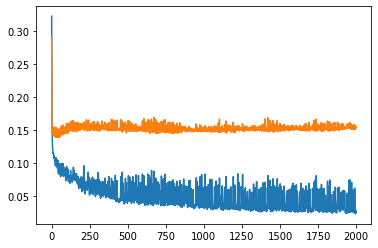

In [92]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.show()

# We now get the RMSE for both train and test sets to see if they differ by much

# Make predictions based on train set and get a root mean squared error 

In [93]:
from sklearn.metrics import mean_squared_error
import math

train_yhat = simple_dense_weather_norm_model.predict(train_X)
mse = mean_squared_error(train_y, train_yhat)
rmse = math.sqrt(mse)

In [94]:
print('Train RMSE: ' + str(rmse))

Train RMSE: 0.06270121460368304


# Make predictions based on test set and get a root mean squared error 

In [95]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = simple_dense_weather_norm_model.predict(test_X)
mse = mean_squared_error(test_y, test_yhat)
rmse = math.sqrt(mse)

In [96]:
print('Test RMSE: ' + str(rmse))

Test RMSE: 0.2073304870169508


# Plot train labels along with train predictions

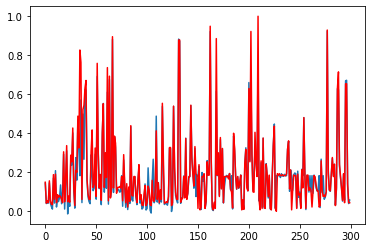

In [97]:
from matplotlib import pyplot

pyplot.plot(train_yhat, label='actual')
pyplot.plot(train_y, color='red', label='predicted')
pyplot.show()

# Plot test labels along with test predictions

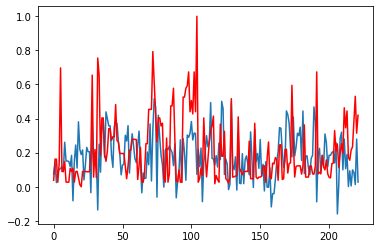

In [98]:
from matplotlib import pyplot

pyplot.plot(test_yhat, label='actual')
pyplot.plot(test_y, color='red', label='predicted')
pyplot.show()